# Face detection

In [1]:
import cv2
from time import sleep
import os

In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from matplotlib import pyplot as plt

In [4]:
def face_detection_img(image_pth):
    #pre=trained data for Haar cascade
    xml_file="C:\\Users\\Harsh\\Desktop\\Major Project\\haarcascade_frontalface_default.xml"
    
    #crating Haar cascade
    faceCascade = cv2.CascadeClassifier(xml_file)
    image=cv2.imread(image_path)
    
    #turning RGB color to grayscale image
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    
    #detecting faces in image
    faces=faceCascade.detectMultiScale(
           gray,
           scaleFactor=1.3,
           minNeighbors=5,
           minSize=(30,50),
           flags=cv2.CASCADE_SCALE_IMAGE)
    
    #drawing rectangle around the faces
    c=0
    for(x,y,w,h) in faces:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),5)
        c_img=cutting_face(image,x,y,w,h)
        fdir="C:\\Users\\Harsh\\Desktop\\Major Project\\detected_face"
    
        os.chdir(fdir)

        cv2.imwrite(str(c)+".jpg",c_img)
        c=c+1
        mdir="C:\\Users\\Harsh\\Desktop\\Major Project"
        os.chdir(mdir)
        display(c_img)
    #cv2.imshow("Faces found", image)
    #cv2.waitKey(0)
    
    #returning image and cordinates of the face 
    return image,c_img

In [5]:
def face_detection_cam():
    # xml file which will help to detection the face
    data="C:\\Users\\Harsh\\Desktop\\Major Project\\haarcascade_frontalface_default.xml"
    
     #createing haar cascade
    face_cap=cv2.CascadeClassifier(data)
    webcam=cv2.VideoCapture(0)
    sleep(2)
    while True:
    
        try:
             # Capture frame-by-frame
            check,frame=webcam.read()
            print(check)
            print(frame)
        
            col = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    
            #detecting face in the image 
            faces=face_cap.detectMultiScale(
                col,
                scaleFactor=1.3,
                minNeighbors=5,
                minSize=(30,30),
                flags=cv2.CASCADE_SCALE_IMAGE
            )
    
            # Draw a rectangle around the faces
            for(x,y,w,h) in faces:
                cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
    
            # Display the resulting frame
            cv2.imshow("Capturing",frame)
        
            key=cv2.waitKey(1)
            #saveing the image
            if key ==ord('s'):
                fdir="C:\\Users\\Harsh\\Desktop\\Major Project\\web_cam_image"
                os.chdir(fdir)

                cv2.imwrite(filename='savedimg.jpg',img=frame)

                mdir="C:\\Users\\Harsh\\Desktop\\Major Project"
                os.chdir(mdir)
               
                
                print("Image saved!")
                webcam.release()
                cv2.destroyAllWindows()
                break
            
            #leave the windows without taking any image
            elif key==ord('q'):
                webcam.release()
                cv2.destroyAllWindows()
                break
        
        #if any error happen than camera will turn off
        except(KeyboardInterrupt):
            print("Turining off camera.")
            webcam.release()
        
            print("Camera off.")
            print("Program ended.")
            cv2.destroyAllWindows()
            break

In [6]:
#display the avalible image using matplotlib
def display(img_,title=''):
    img=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,6))
    ax=plt.subplot(111)
    ax.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()
    

In [7]:
#extracting green box faces from the image
def cutting_face(img,x,y,w,h):
    cut_image= img[y:y+h,x:x+w]
    
    return cut_image

In [8]:
face_detection_cam()

True
[[[ 1  2  0]
  [ 1  2  0]
  [ 1  2  0]
  ...
  [ 2 11  8]
  [ 4 12 10]
  [ 0  6  5]]

 [[ 1  2  0]
  [ 1  2  0]
  [ 1  2  0]
  ...
  [ 3 12  9]
  [ 4 12  9]
  [ 1  9  7]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 2  2  2]
  ...
  [ 2 12  7]
  [ 2 11  8]
  [ 1 10  7]]

 ...

 [[ 0  5  3]
  [ 0  5  3]
  [ 0  6  4]
  ...
  [ 2 11  7]
  [ 2 12  7]
  [ 2 12  6]]

 [[ 0  5  3]
  [ 0  5  3]
  [ 0  6  4]
  ...
  [ 3 12  8]
  [ 4 13  9]
  [ 4 13  9]]

 [[ 0  5  3]
  [ 0  5  3]
  [ 0  6  4]
  ...
  [ 3 12  9]
  [ 5 14 11]
  [ 5 14 11]]]
True
[[[ 8 14 13]
  [ 6 14 12]
  [ 2 12  9]
  ...
  [70 71 71]
  [71 70 70]
  [69 67 67]]

 [[ 5 11 10]
  [ 4 12  9]
  [ 1 11  8]
  ...
  [69 69 69]
  [70 69 69]
  [71 69 69]]

 [[ 2  9  6]
  [ 2 10  6]
  [ 2 12  7]
  ...
  [67 67 65]
  [69 67 67]
  [70 67 67]]

 ...

 [[45 44 43]
  [46 45 44]
  [45 46 44]
  ...
  [91 82 75]
  [91 83 75]
  [91 83 74]]

 [[46 46 43]
  [45 46 43]
  [43 45 42]
  ...
  [95 85 78]
  [93 83 76]
  [94 83 76]]

 [[47 49 44]
  [46 48 43]
  [43 

True
[[[ 4 14 16]
  [ 5 15 16]
  [ 5 15 16]
  ...
  [71 74 69]
  [71 72 69]
  [70 71 68]]

 [[ 2 12 14]
  [ 3 13 14]
  [ 4 14 15]
  ...
  [71 74 69]
  [71 72 69]
  [72 72 69]]

 [[ 0 11 13]
  [ 2 13 14]
  [ 4 15 16]
  ...
  [69 71 65]
  [70 70 66]
  [70 70 66]]

 ...

 [[39 45 45]
  [39 45 45]
  [39 45 45]
  ...
  [85 81 80]
  [85 81 79]
  [84 81 77]]

 [[40 45 47]
  [40 45 47]
  [41 45 47]
  ...
  [88 83 82]
  [88 83 81]
  [87 82 80]]

 [[38 43 46]
  [39 44 47]
  [40 44 47]
  ...
  [90 84 85]
  [89 84 83]
  [88 83 81]]]
True
[[[ 4 14 16]
  [ 5 15 16]
  [ 5 15 16]
  ...
  [71 74 69]
  [71 72 69]
  [70 71 68]]

 [[ 2 12 14]
  [ 3 13 14]
  [ 4 14 15]
  ...
  [71 74 69]
  [71 72 69]
  [72 72 69]]

 [[ 0 11 13]
  [ 2 13 14]
  [ 4 15 16]
  ...
  [69 71 65]
  [70 70 66]
  [70 70 66]]

 ...

 [[39 45 45]
  [39 45 45]
  [39 45 45]
  ...
  [85 81 80]
  [85 81 79]
  [84 81 77]]

 [[40 45 47]
  [40 45 47]
  [41 45 47]
  ...
  [88 83 82]
  [88 83 81]
  [87 82 80]]

 [[38 43 46]
  [39 44 47]
  [40 

True
[[[10  9  5]
  [10 11  5]
  [ 6 11  3]
  ...
  [72 77 63]
  [71 76 61]
  [70 75 60]]

 [[10  9  5]
  [11 12  6]
  [ 7 12  4]
  ...
  [71 75 63]
  [70 74 62]
  [70 75 61]]

 [[11 10  6]
  [12 13  8]
  [10 14  7]
  ...
  [69 72 63]
  [70 73 64]
  [70 74 63]]

 ...

 [[32 45 43]
  [32 45 43]
  [34 45 43]
  ...
  [16 16 16]
  [19 19 19]
  [22 22 22]]

 [[33 45 44]
  [34 45 44]
  [35 45 45]
  ...
  [16 16 16]
  [18 18 18]
  [21 21 21]]

 [[33 43 43]
  [34 44 44]
  [36 46 46]
  ...
  [15 15 15]
  [17 17 17]
  [19 19 19]]]
True
[[[10  9  5]
  [10 11  5]
  [ 6 11  3]
  ...
  [72 77 63]
  [71 76 61]
  [70 75 60]]

 [[10  9  5]
  [11 12  6]
  [ 7 12  4]
  ...
  [71 75 63]
  [70 74 62]
  [70 75 61]]

 [[11 10  6]
  [12 13  8]
  [10 14  7]
  ...
  [69 72 63]
  [70 73 64]
  [70 74 63]]

 ...

 [[32 45 43]
  [32 45 43]
  [34 45 43]
  ...
  [16 16 16]
  [19 19 19]
  [22 22 22]]

 [[33 45 44]
  [34 45 44]
  [35 45 45]
  ...
  [16 16 16]
  [18 18 18]
  [21 21 21]]

 [[33 43 43]
  [34 44 44]
  [36 

True
[[[10 16  0]
  [10 16  0]
  [11 16  2]
  ...
  [71 71 65]
  [70 69 63]
  [69 67 61]]

 [[12 18  1]
  [12 17  2]
  [12 17  3]
  ...
  [69 69 63]
  [70 69 63]
  [69 68 62]]

 [[13 20  4]
  [12 18  3]
  [11 17  4]
  ...
  [66 66 60]
  [67 67 62]
  [68 67 63]]

 ...

 [[43 44 41]
  [42 44 41]
  [43 45 43]
  ...
  [89 81 78]
  [89 80 77]
  [88 79 77]]

 [[44 46 44]
  [44 46 44]
  [43 46 44]
  ...
  [92 82 81]
  [90 80 80]
  [89 79 79]]

 [[44 47 46]
  [44 47 46]
  [45 48 47]
  ...
  [93 83 83]
  [92 82 83]
  [90 80 81]]]
True
[[[ 7 14  0]
  [ 7 14  3]
  [ 7 15  6]
  ...
  [62 67 55]
  [64 70 62]
  [66 71 66]]

 [[ 5 12  0]
  [ 6 13  2]
  [ 6 13  5]
  ...
  [61 66 55]
  [62 68 61]
  [65 70 66]]

 [[ 4 11  1]
  [ 5 12  2]
  [ 5 12  5]
  ...
  [59 65 57]
  [61 66 62]
  [63 67 65]]

 ...

 [[36 45 45]
  [36 46 46]
  [36 47 47]
  ...
  [93 79 77]
  [90 75 73]
  [89 74 72]]

 [[32 40 40]
  [32 41 41]
  [32 43 43]
  ...
  [91 78 74]
  [88 74 70]
  [87 72 69]]

 [[32 40 40]
  [31 40 40]
  [31 

True
[[[17 15  7]
  [14 13  5]
  [12 13  4]
  ...
  [79 67 59]
  [78 64 52]
  [77 61 48]]

 [[14 14  5]
  [13 13  4]
  [12 13  4]
  ...
  [76 66 59]
  [78 66 56]
  [78 64 53]]

 [[11 12  2]
  [11 12  2]
  [11 13  3]
  ...
  [75 68 66]
  [78 68 64]
  [78 68 62]]

 ...

 [[33 41 40]
  [34 42 41]
  [36 44 43]
  ...
  [87 80 68]
  [90 83 70]
  [94 87 74]]

 [[32 39 39]
  [34 41 41]
  [36 43 43]
  ...
  [91 81 70]
  [94 85 72]
  [97 88 75]]

 [[32 38 38]
  [34 40 40]
  [37 43 43]
  ...
  [94 83 72]
  [96 87 74]
  [98 89 76]]]
True
[[[17 15  7]
  [14 13  5]
  [12 13  4]
  ...
  [79 67 59]
  [78 64 52]
  [77 61 48]]

 [[14 14  5]
  [13 13  4]
  [12 13  4]
  ...
  [76 66 59]
  [78 66 56]
  [78 64 53]]

 [[11 12  2]
  [11 12  2]
  [11 13  3]
  ...
  [75 68 66]
  [78 68 64]
  [78 68 62]]

 ...

 [[33 41 40]
  [34 42 41]
  [36 44 43]
  ...
  [87 80 68]
  [90 83 70]
  [94 87 74]]

 [[32 39 39]
  [34 41 41]
  [36 43 43]
  ...
  [91 81 70]
  [94 85 72]
  [97 88 75]]

 [[32 38 38]
  [34 40 40]
  [37 

True
[[[16 12  7]
  [16 13  6]
  [16 14  7]
  ...
  [70 78 52]
  [66 75 45]
  [64 73 41]]

 [[15 13  7]
  [15 13  6]
  [15 14  7]
  ...
  [67 75 52]
  [66 74 48]
  [64 72 44]]

 [[11 12  6]
  [11 12  6]
  [11 12  5]
  ...
  [64 71 55]
  [64 71 51]
  [64 70 49]]

 ...

 [[40 41 41]
  [41 44 43]
  [44 47 46]
  ...
  [86 81 76]
  [85 80 75]
  [87 82 77]]

 [[37 42 41]
  [40 45 44]
  [43 48 47]
  ...
  [89 81 78]
  [88 80 77]
  [90 82 79]]

 [[36 42 41]
  [38 44 43]
  [41 47 46]
  ...
  [92 83 80]
  [91 82 79]
  [92 83 80]]]
True
[[[ 6 11  0]
  [ 6 11  0]
  [ 7 12  0]
  ...
  [67 64 67]
  [66 61 69]
  [68 62 73]]

 [[ 6 11  0]
  [ 6 11  0]
  [ 7 12  0]
  ...
  [69 66 68]
  [69 65 71]
  [71 66 75]]

 [[ 9 14  0]
  [10 15  2]
  [ 9 14  2]
  ...
  [71 68 70]
  [71 67 72]
  [73 69 75]]

 ...

 [[30 42 43]
  [30 42 43]
  [32 44 45]
  ...
  [91 81 77]
  [93 83 79]
  [93 83 79]]

 [[31 43 44]
  [32 45 45]
  [32 47 47]
  ...
  [95 83 80]
  [96 84 81]
  [97 85 82]]

 [[31 44 43]
  [33 46 45]
  [34 

True
[[[14 17  2]
  [14 18  3]
  [15 19  4]
  ...
  [65 68 59]
  [66 67 57]
  [67 66 56]]

 [[14 16  3]
  [13 17  3]
  [12 17  3]
  ...
  [65 68 59]
  [67 68 58]
  [68 67 57]]

 [[12 14  2]
  [11 14  2]
  [10 15  1]
  ...
  [69 72 61]
  [72 73 61]
  [74 74 62]]

 ...

 [[38 45 42]
  [38 45 42]
  [40 46 43]
  ...
  [87 78 75]
  [88 79 77]
  [89 79 78]]

 [[41 48 45]
  [41 48 45]
  [42 48 45]
  ...
  [89 79 75]
  [90 80 76]
  [90 80 76]]

 [[42 49 46]
  [42 49 46]
  [43 49 46]
  ...
  [91 80 76]
  [91 80 76]
  [91 80 76]]]
True
[[[14 17  2]
  [14 18  3]
  [15 19  4]
  ...
  [65 68 59]
  [66 67 57]
  [67 66 56]]

 [[14 16  3]
  [13 17  3]
  [12 17  3]
  ...
  [65 68 59]
  [67 68 58]
  [68 67 57]]

 [[12 14  2]
  [11 14  2]
  [10 15  1]
  ...
  [69 72 61]
  [72 73 61]
  [74 74 62]]

 ...

 [[38 45 42]
  [38 45 42]
  [40 46 43]
  ...
  [87 78 75]
  [88 79 77]
  [89 79 78]]

 [[41 48 45]
  [41 48 45]
  [42 48 45]
  ...
  [89 79 75]
  [90 80 76]
  [90 80 76]]

 [[42 49 46]
  [42 49 46]
  [43 

True
[[[ 15  14   0]
  [ 16  15   1]
  [ 19  18   4]
  ...
  [ 80  87  73]
  [ 77  84  70]
  [ 72  79  65]]

 [[ 14  13   0]
  [ 15  14   0]
  [ 16  16   3]
  ...
  [ 81  88  75]
  [ 79  86  73]
  [ 75  82  69]]

 [[ 12  13   0]
  [ 13  14   1]
  [ 14  15   3]
  ...
  [ 81  89  77]
  [ 80  88  76]
  [ 79  87  75]]

 ...

 [[ 45  61  54]
  [ 48  64  57]
  [ 52  67  60]
  ...
  [104  96  93]
  [105  97  94]
  [105  97  93]]

 [[ 44  60  53]
  [ 47  63  56]
  [ 50  66  59]
  ...
  [104  96  91]
  [106  97  91]
  [106  97  91]]

 [[ 45  61  54]
  [ 47  63  56]
  [ 49  65  58]
  ...
  [103  95  89]
  [106  97  91]
  [108  98  91]]]
True
[[[ 15  14   0]
  [ 16  15   1]
  [ 19  18   4]
  ...
  [ 80  87  73]
  [ 77  84  70]
  [ 72  79  65]]

 [[ 14  13   0]
  [ 15  14   0]
  [ 16  16   3]
  ...
  [ 81  88  75]
  [ 79  86  73]
  [ 75  82  69]]

 [[ 12  13   0]
  [ 13  14   1]
  [ 14  15   3]
  ...
  [ 81  89  77]
  [ 80  88  76]
  [ 79  87  75]]

 ...

 [[ 45  61  54]
  [ 48  64  57]
  [ 52  67

True
[[[  8  18  12]
  [  9  19  13]
  [ 10  20  14]
  ...
  [ 89  86  84]
  [ 89  87  85]
  [ 89  88  85]]

 [[  9  19  13]
  [  8  18  12]
  [ 10  20  14]
  ...
  [ 87  85  82]
  [ 86  85  82]
  [ 86  85  82]]

 [[ 11  20  13]
  [  9  18  12]
  [  8  18  13]
  ...
  [ 83  82  78]
  [ 83  82  78]
  [ 82  81  77]]

 ...

 [[ 59  64  59]
  [ 60  64  59]
  [ 62  64  61]
  ...
  [103  96  97]
  [105  97  98]
  [105  97  98]]

 [[ 57  64  58]
  [ 58  64  59]
  [ 60  65  60]
  ...
  [105  97  97]
  [106  98  98]
  [106  98  98]]

 [[ 54  62  56]
  [ 56  64  58]
  [ 57  63  58]
  ...
  [105  98  96]
  [106  99  97]
  [106  99  97]]]
True
[[[  8  18  12]
  [  9  19  13]
  [ 10  20  14]
  ...
  [ 89  86  84]
  [ 89  87  85]
  [ 89  88  85]]

 [[  9  19  13]
  [  8  18  12]
  [ 10  20  14]
  ...
  [ 87  85  82]
  [ 86  85  82]
  [ 86  85  82]]

 [[ 11  20  13]
  [  9  18  12]
  [  8  18  13]
  ...
  [ 83  82  78]
  [ 83  82  78]
  [ 82  81  77]]

 ...

 [[ 59  64  59]
  [ 60  64  59]
  [ 62  64

True
[[[ 11  16   1]
  [ 11  16   1]
  [ 11  17   3]
  ...
  [ 81  80  80]
  [ 84  81  86]
  [ 86  82  88]]

 [[ 11  17   3]
  [ 10  17   3]
  [ 11  18   5]
  ...
  [ 78  77  76]
  [ 81  79  82]
  [ 82  78  83]]

 [[  9  18   5]
  [  8  17   4]
  [  9  18   5]
  ...
  [ 77  77  74]
  [ 79  78  78]
  [ 79  76  78]]

 ...

 [[ 45  55  53]
  [ 46  56  54]
  [ 47  55  54]
  ...
  [106  97  97]
  [105  97  97]
  [105  97  97]]

 [[ 46  53  53]
  [ 46  53  53]
  [ 46  53  53]
  ...
  [106  98  99]
  [106  99 100]
  [106  99 100]]

 [[ 46  52  52]
  [ 46  52  52]
  [ 46  52  52]
  ...
  [107  99 100]
  [106  99 100]
  [106 100 101]]]
True
[[[ 13  17   4]
  [ 15  19   7]
  [ 17  21  10]
  ...
  [ 82  80  87]
  [ 83  81  86]
  [ 80  79  83]]

 [[ 10  14   2]
  [ 12  16   4]
  [ 15  19   8]
  ...
  [ 79  77  83]
  [ 82  81  85]
  [ 83  81  84]]

 [[ 11  15   4]
  [ 12  16   5]
  [ 14  17   6]
  ...
  [ 77  75  81]
  [ 81  79  82]
  [ 82  80  83]]

 ...

 [[ 50  54  59]
  [ 51  55  60]
  [ 52  57

True
[[[ 13  21   4]
  [ 13  21   5]
  [ 13  21   8]
  ...
  [ 89  92  76]
  [ 90  93  78]
  [ 90  93  78]]

 [[ 12  20   4]
  [ 11  18   4]
  [ 11  18   7]
  ...
  [ 85  89  73]
  [ 85  89  74]
  [ 84  88  73]]

 [[  9  16   3]
  [  8  14   3]
  [  8  14   6]
  ...
  [ 83  88  73]
  [ 83  88  73]
  [ 83  87  72]]

 ...

 [[ 45  58  56]
  [ 46  58  56]
  [ 47  58  56]
  ...
  [112 106 100]
  [112 105 100]
  [113 105 101]]

 [[ 44  57  56]
  [ 45  57  56]
  [ 45  55  55]
  ...
  [109 104  96]
  [110 103  97]
  [110 103  97]]

 [[ 43  56  55]
  [ 43  54  54]
  [ 43  53  53]
  ...
  [109 104  95]
  [110 105  97]
  [110 105  97]]]
True
[[[ 13  21   4]
  [ 13  21   5]
  [ 13  21   8]
  ...
  [ 89  92  76]
  [ 90  93  78]
  [ 90  93  78]]

 [[ 12  20   4]
  [ 11  18   4]
  [ 11  18   7]
  ...
  [ 85  89  73]
  [ 85  89  74]
  [ 84  88  73]]

 [[  9  16   3]
  [  8  14   3]
  [  8  14   6]
  ...
  [ 83  88  73]
  [ 83  88  73]
  [ 83  87  72]]

 ...

 [[ 45  58  56]
  [ 46  58  56]
  [ 47  58

True
[[[ 11  16   9]
  [ 11  16   9]
  [ 11  16  11]
  ...
  [ 80  83  78]
  [ 82  84  78]
  [ 81  83  77]]

 [[ 12  16   9]
  [ 10  15   8]
  [  9  14   9]
  ...
  [ 78  82  77]
  [ 78  81  75]
  [ 78  80  74]]

 [[ 13  15   9]
  [ 11  14   8]
  [ 10  14   9]
  ...
  [ 78  83  79]
  [ 77  81  76]
  [ 76  79  74]]

 ...

 [[ 46  47  45]
  [ 48  49  47]
  [ 51  51  51]
  ...
  [112  98  94]
  [112  96  93]
  [111  95  92]]

 [[ 45  47  46]
  [ 46  48  47]
  [ 48  49  49]
  ...
  [112  96  94]
  [113  96  93]
  [114  96  93]]

 [[ 44  47  46]
  [ 45  48  47]
  [ 47  50  49]
  ...
  [112  96  94]
  [115  97  94]
  [118  99  96]]]
True
[[[ 10  11   2]
  [  9  11   2]
  [  9  12   1]
  ...
  [ 85  88  87]
  [ 84  88  86]
  [ 83  88  84]]

 [[  8  10   1]
  [  9  11   2]
  [  9  12   2]
  ...
  [ 81  85  84]
  [ 81  85  83]
  [ 80  86  83]]

 [[ 10  12   3]
  [ 11  14   5]
  [ 10  14   5]
  ...
  [ 78  82  81]
  [ 78  83  82]
  [ 77  83  82]]

 ...

 [[ 43  54  54]
  [ 45  56  56]
  [ 46  58

True
[[[  0  10   4]
  [  1  11   5]
  [  3  13   7]
  ...
  [ 95  84  87]
  [ 96  85  85]
  [ 96  84  83]]

 [[  1  11   5]
  [  1  11   5]
  [  3  13   7]
  ...
  [ 93  82  84]
  [ 93  83  83]
  [ 94  83  82]]

 [[  4  14   8]
  [  4  14   8]
  [  4  14   8]
  ...
  [ 91  83  84]
  [ 92  83  83]
  [ 93  84  83]]

 ...

 [[ 47  59  61]
  [ 46  58  60]
  [ 46  58  60]
  ...
  [104  99  98]
  [105 101  97]
  [107 102  97]]

 [[ 48  59  63]
  [ 48  59  63]
  [ 47  60  63]
  ...
  [105 100  98]
  [108 103  98]
  [110 104  98]]

 [[ 47  58  62]
  [ 48  59  63]
  [ 47  59  63]
  ...
  [108 102  99]
  [111 105  99]
  [110 105  97]]]
True
[[[  0  10   4]
  [  1  11   5]
  [  3  13   7]
  ...
  [ 95  84  87]
  [ 96  85  85]
  [ 96  84  83]]

 [[  1  11   5]
  [  1  11   5]
  [  3  13   7]
  ...
  [ 93  82  84]
  [ 93  83  83]
  [ 94  83  82]]

 [[  4  14   8]
  [  4  14   8]
  [  4  14   8]
  ...
  [ 91  83  84]
  [ 92  83  83]
  [ 93  84  83]]

 ...

 [[ 47  59  61]
  [ 46  58  60]
  [ 46  58

True
[[[  8   5   1]
  [  6   5   1]
  [  5   7   2]
  ...
  [ 85  91  67]
  [ 85  92  65]
  [ 85  92  65]]

 [[ 10   9   5]
  [  9  10   5]
  [  7  11   6]
  ...
  [ 83  88  66]
  [ 84  90  66]
  [ 85  91  66]]

 [[ 11  16   9]
  [ 11  17  10]
  [  9  17  11]
  ...
  [ 84  88  70]
  [ 85  89  70]
  [ 85  89  70]]

 ...

 [[ 42  55  53]
  [ 42  55  53]
  [ 41  54  52]
  ...
  [105  97  88]
  [106  97  87]
  [107  98  88]]

 [[ 39  54  51]
  [ 39  53  51]
  [ 41  54  52]
  ...
  [108  99  90]
  [110 100  91]
  [110 100  91]]

 [[ 40  55  52]
  [ 40  55  52]
  [ 42  55  53]
  ...
  [110 101  92]
  [112 101  93]
  [112 101  93]]]
True
[[[  8   5   1]
  [  6   5   1]
  [  5   7   2]
  ...
  [ 85  91  67]
  [ 85  92  65]
  [ 85  92  65]]

 [[ 10   9   5]
  [  9  10   5]
  [  7  11   6]
  ...
  [ 83  88  66]
  [ 84  90  66]
  [ 85  91  66]]

 [[ 11  16   9]
  [ 11  17  10]
  [  9  17  11]
  ...
  [ 84  88  70]
  [ 85  89  70]
  [ 85  89  70]]

 ...

 [[ 42  55  53]
  [ 42  55  53]
  [ 41  54

True
[[[ 11  14   0]
  [ 11  15   0]
  [  9  16   2]
  ...
  [ 85  87  74]
  [ 85  86  72]
  [ 86  87  72]]

 [[ 12  16   2]
  [ 12  17   3]
  [ 10  17   4]
  ...
  [ 84  86  73]
  [ 85  87  72]
  [ 85  86  71]]

 [[ 13  16   4]
  [ 13  17   6]
  [ 10  16   5]
  ...
  [ 80  83  68]
  [ 82  84  68]
  [ 84  85  69]]

 ...

 [[ 49  58  56]
  [ 50  59  57]
  [ 53  62  60]
  ...
  [102  95  92]
  [103  97  94]
  [103  98  95]]

 [[ 46  56  53]
  [ 50  60  57]
  [ 54  64  61]
  ...
  [105  98  95]
  [104  98  96]
  [102  97  95]]

 [[ 43  55  50]
  [ 48  60  56]
  [ 54  66  62]
  ...
  [106  99  96]
  [105  99  97]
  [103  98  96]]]
True
[[[  8  11   2]
  [  7  10   2]
  [  7  10   2]
  ...
  [ 90  89  85]
  [ 91  89  89]
  [ 90  87  89]]

 [[  8  11   3]
  [  8  11   3]
  [  8  10   4]
  ...
  [ 86  85  81]
  [ 87  85  85]
  [ 86  83  85]]

 [[ 10  13   7]
  [ 10  13   7]
  [ 11  13   8]
  ...
  [ 83  84  79]
  [ 84  82  81]
  [ 83  81  81]]

 ...

 [[ 41  52  50]
  [ 42  53  51]
  [ 44  55

True
[[[  8  17   1]
  [  6  16   0]
  [  5  16   1]
  ...
  [ 79  79  75]
  [ 82  78  76]
  [ 82  77  76]]

 [[  5  15   0]
  [  4  14   0]
  [  4  14   1]
  ...
  [ 78  79  76]
  [ 79  77  76]
  [ 80  76  75]]

 [[  4  14   1]
  [  4  14   2]
  [  3  13   3]
  ...
  [ 79  83  80]
  [ 80  82  80]
  [ 80  80  80]]

 ...

 [[ 52  54  53]
  [ 51  54  53]
  [ 51  54  53]
  ...
  [103  97  92]
  [103  97  91]
  [103  97  91]]

 [[ 53  54  52]
  [ 53  54  52]
  [ 51  52  52]
  ...
  [101  95  89]
  [101  95  89]
  [102  96  90]]

 [[ 52  53  50]
  [ 52  53  51]
  [ 52  52  52]
  ...
  [101  95  89]
  [102  96  90]
  [103  98  90]]]
True
[[[  8  17   1]
  [  6  16   0]
  [  5  16   1]
  ...
  [ 79  79  75]
  [ 82  78  76]
  [ 82  77  76]]

 [[  5  15   0]
  [  4  14   0]
  [  4  14   1]
  ...
  [ 78  79  76]
  [ 79  77  76]
  [ 80  76  75]]

 [[  4  14   1]
  [  4  14   2]
  [  3  13   3]
  ...
  [ 79  83  80]
  [ 80  82  80]
  [ 80  80  80]]

 ...

 [[ 52  54  53]
  [ 51  54  53]
  [ 51  54

True
[[[  6  15   5]
  [  7  16   6]
  [  7  17   4]
  ...
  [ 83  90  66]
  [ 84  91  67]
  [ 83  91  67]]

 [[  7  15   5]
  [  8  17   5]
  [  8  17   4]
  ...
  [ 81  88  65]
  [ 79  87  64]
  [ 78  86  63]]

 [[  8  16   3]
  [ 10  18   5]
  [  9  17   4]
  ...
  [ 78  86  65]
  [ 77  86  63]
  [ 76  85  62]]

 ...

 [[ 55  56  50]
  [ 56  58  52]
  [ 57  59  54]
  ...
  [108 101 102]
  [106 101 102]
  [104 101 101]]

 [[ 56  57  52]
  [ 58  59  54]
  [ 58  60  55]
  ...
  [108 101 102]
  [106 102 102]
  [103 101 101]]

 [[ 58  57  53]
  [ 58  58  54]
  [ 59  60  55]
  ...
  [107 100 101]
  [104 101 101]
  [103 101 101]]]
True
[[[  8  17   1]
  [  8  17   1]
  [  8  15   1]
  ...
  [ 82  85  76]
  [ 84  86  81]
  [ 84  85  82]]

 [[  4  13   0]
  [  6  14   0]
  [  9  16   2]
  ...
  [ 80  83  75]
  [ 80  82  77]
  [ 79  80  78]]

 [[  4  11   0]
  [  8  15   1]
  [ 10  18   4]
  ...
  [ 77  79  73]
  [ 76  77  74]
  [ 76  77  75]]

 ...

 [[ 44  54  47]
  [ 43  53  46]
  [ 42  52

True
[[[ 12  16  15]
  [ 11  16  15]
  [ 10  16  16]
  ...
  [ 79  82  80]
  [ 81  84  83]
  [ 84  87  86]]

 [[  9  13  12]
  [  9  14  13]
  [  9  15  15]
  ...
  [ 79  84  80]
  [ 80  84  81]
  [ 81  85  83]]

 [[  7  11  10]
  [  7  12  11]
  [  6  12  12]
  ...
  [ 82  89  82]
  [ 82  89  82]
  [ 82  89  83]]

 ...

 [[ 48  60  56]
  [ 48  60  55]
  [ 47  59  54]
  ...
  [106  95  95]
  [107  94  94]
  [107  92  93]]

 [[ 48  61  53]
  [ 48  61  53]
  [ 46  59  50]
  ...
  [110  98  97]
  [111  96  96]
  [112  96  96]]

 [[ 49  63  52]
  [ 49  63  52]
  [ 47  61  50]
  ...
  [114 101 100]
  [115 100 100]
  [115  99  99]]]
True
[[[ 12  16  15]
  [ 11  16  15]
  [ 10  16  16]
  ...
  [ 79  82  80]
  [ 81  84  83]
  [ 84  87  86]]

 [[  9  13  12]
  [  9  14  13]
  [  9  15  15]
  ...
  [ 79  84  80]
  [ 80  84  81]
  [ 81  85  83]]

 [[  7  11  10]
  [  7  12  11]
  [  6  12  12]
  ...
  [ 82  89  82]
  [ 82  89  82]
  [ 82  89  83]]

 ...

 [[ 48  60  56]
  [ 48  60  55]
  [ 47  59

True
[[[ 13  13   7]
  [ 12  13   7]
  [ 13  14   8]
  ...
  [ 83  83  80]
  [ 82  83  83]
  [ 83  85  86]]

 [[  9  10   4]
  [  9  11   5]
  [ 10  13   7]
  ...
  [ 85  85  82]
  [ 84  85  85]
  [ 86  87  88]]

 [[  5   9   5]
  [  5  10   6]
  [  7  12   8]
  ...
  [ 88  89  86]
  [ 90  90  90]
  [ 91  91  92]]

 ...

 [[ 50  53  50]
  [ 49  52  49]
  [ 49  52  49]
  ...
  [106 101  97]
  [106 101  96]
  [108 102  97]]

 [[ 49  51  52]
  [ 49  51  52]
  [ 50  52  53]
  ...
  [109 104 100]
  [108 103  98]
  [107 102  97]]

 [[ 48  49  53]
  [ 49  50  53]
  [ 50  52  54]
  ...
  [109 105 101]
  [107 103  98]
  [105 101  96]]]
True
[[[ 13  13   7]
  [ 12  13   7]
  [ 13  14   8]
  ...
  [ 83  83  80]
  [ 82  83  83]
  [ 83  85  86]]

 [[  9  10   4]
  [  9  11   5]
  [ 10  13   7]
  ...
  [ 85  85  82]
  [ 84  85  85]
  [ 86  87  88]]

 [[  5   9   5]
  [  5  10   6]
  [  7  12   8]
  ...
  [ 88  89  86]
  [ 90  90  90]
  [ 91  91  92]]

 ...

 [[ 50  53  50]
  [ 49  52  49]
  [ 49  52

True
[[[ 21  17  23]
  [ 20  17  23]
  [ 18  18  22]
  ...
  [ 93  91  80]
  [ 91  89  78]
  [ 89  87  76]]

 [[ 21  18  24]
  [ 20  17  23]
  [ 18  18  22]
  ...
  [ 92  90  79]
  [ 90  88  77]
  [ 88  86  75]]

 [[ 21  18  24]
  [ 19  17  23]
  [ 18  18  22]
  ...
  [ 89  88  78]
  [ 89  87  77]
  [ 88  86  76]]

 ...

 [[ 59  59  60]
  [ 60  60  61]
  [ 60  60  60]
  ...
  [108 101  99]
  [108 101  99]
  [108 101  99]]

 [[ 57  58  58]
  [ 57  58  58]
  [ 57  58  58]
  ...
  [108 101 101]
  [108 101 101]
  [108 101 101]]

 [[ 55  58  57]
  [ 55  58  57]
  [ 54  57  56]
  ...
  [106 100 101]
  [106 100 101]
  [107 101 102]]]
True
[[[ 14  17  18]
  [ 10  13  14]
  [  7   9   9]
  ...
  [ 85  84  80]
  [ 85  85  79]
  [ 85  85  79]]

 [[ 11  14  15]
  [  9  12  13]
  [  8  10  10]
  ...
  [ 83  83  77]
  [ 85  85  78]
  [ 87  87  80]]

 [[ 10  13  14]
  [ 10  13  14]
  [ 11  13  13]
  ...
  [ 81  82  74]
  [ 85  86  77]
  [ 88  89  80]]

 ...

 [[ 49  53  52]
  [ 50  54  53]
  [ 51  56

True
[[[ 16  17  15]
  [ 14  17  14]
  [ 10  17  12]
  ...
  [ 85  78  81]
  [ 90  83  86]
  [ 95  88  91]]

 [[ 15  17  15]
  [ 14  17  14]
  [ 11  18  14]
  ...
  [ 83  77  79]
  [ 87  81  83]
  [ 90  84  86]]

 [[ 14  18  16]
  [ 12  18  14]
  [ 10  18  14]
  ...
  [ 83  78  79]
  [ 86  80  81]
  [ 87  81  82]]

 ...

 [[ 46  58  56]
  [ 46  58  56]
  [ 46  58  56]
  ...
  [103  97  92]
  [105  98  93]
  [106  99  93]]

 [[ 47  58  56]
  [ 48  59  57]
  [ 48  59  57]
  ...
  [104  97  92]
  [105  98  92]
  [108 100  94]]

 [[ 45  56  54]
  [ 46  57  55]
  [ 47  58  56]
  ...
  [101  94  88]
  [105  97  91]
  [108 100  93]]]
True
[[[ 16  17  15]
  [ 14  17  14]
  [ 10  17  12]
  ...
  [ 85  78  81]
  [ 90  83  86]
  [ 95  88  91]]

 [[ 15  17  15]
  [ 14  17  14]
  [ 11  18  14]
  ...
  [ 83  77  79]
  [ 87  81  83]
  [ 90  84  86]]

 [[ 14  18  16]
  [ 12  18  14]
  [ 10  18  14]
  ...
  [ 83  78  79]
  [ 86  80  81]
  [ 87  81  82]]

 ...

 [[ 46  58  56]
  [ 46  58  56]
  [ 46  58

True
[[[ 10  15   1]
  [ 11  16   2]
  [ 11  16   2]
  ...
  [ 89  89  82]
  [ 87  87  81]
  [ 86  85  81]]

 [[ 11  15   4]
  [ 12  16   5]
  [ 12  16   5]
  ...
  [ 85  85  78]
  [ 83  83  77]
  [ 82  81  77]]

 [[ 16  19  11]
  [ 15  18  10]
  [ 14  18  10]
  ...
  [ 84  84  77]
  [ 84  84  78]
  [ 83  83  77]]

 ...

 [[ 44  54  61]
  [ 45  56  62]
  [ 47  58  63]
  ...
  [115 103 105]
  [107  95  95]
  [104  91  91]]

 [[ 45  55  59]
  [ 47  57  61]
  [ 49  59  63]
  ...
  [114 101 103]
  [107  92  94]
  [106  91  93]]

 [[ 44  53  56]
  [ 47  56  59]
  [ 50  60  62]
  ...
  [115 101 103]
  [106  91  93]
  [107  90  93]]]
True
[[[ 10  15   1]
  [ 11  16   2]
  [ 11  16   2]
  ...
  [ 89  89  82]
  [ 87  87  81]
  [ 86  85  81]]

 [[ 11  15   4]
  [ 12  16   5]
  [ 12  16   5]
  ...
  [ 85  85  78]
  [ 83  83  77]
  [ 82  81  77]]

 [[ 16  19  11]
  [ 15  18  10]
  [ 14  18  10]
  ...
  [ 84  84  77]
  [ 84  84  78]
  [ 83  83  77]]

 ...

 [[ 44  54  61]
  [ 45  56  62]
  [ 47  58

True
[[[ 14  24   2]
  [ 14  23   3]
  [ 15  24   5]
  ...
  [ 84  88  77]
  [ 83  87  75]
  [ 82  86  73]]

 [[ 13  23   4]
  [ 12  22   3]
  [ 12  21   4]
  ...
  [ 84  88  77]
  [ 83  87  76]
  [ 81  85  74]]

 [[ 10  20   5]
  [ 10  20   7]
  [ 10  20   7]
  ...
  [ 82  85  77]
  [ 82  85  77]
  [ 82  85  77]]

 ...

 [[ 41  52  46]
  [ 42  53  47]
  [ 43  56  49]
  ...
  [108  99  96]
  [108  98  95]
  [108  97  94]]

 [[ 39  48  41]
  [ 40  50  43]
  [ 44  55  47]
  ...
  [109 100  97]
  [108  98  95]
  [108  97  94]]

 [[ 39  47  40]
  [ 41  50  43]
  [ 44  55  47]
  ...
  [109 100  97]
  [107  97  94]
  [106  95  92]]]
True
[[[ 14  24   2]
  [ 14  23   3]
  [ 15  24   5]
  ...
  [ 84  88  77]
  [ 83  87  75]
  [ 82  86  73]]

 [[ 13  23   4]
  [ 12  22   3]
  [ 12  21   4]
  ...
  [ 84  88  77]
  [ 83  87  76]
  [ 81  85  74]]

 [[ 10  20   5]
  [ 10  20   7]
  [ 10  20   7]
  ...
  [ 82  85  77]
  [ 82  85  77]
  [ 82  85  77]]

 ...

 [[ 41  52  46]
  [ 42  53  47]
  [ 43  56

True
[[[10 12  6]
  [ 9 11  5]
  [ 7 10  6]
  ...
  [86 84 73]
  [87 82 77]
  [88 81 80]]

 [[11 13  8]
  [10 12  7]
  [ 8 10  7]
  ...
  [85 84 73]
  [88 83 77]
  [89 83 80]]

 [[11 12 10]
  [11 12 10]
  [10 12 10]
  ...
  [85 86 74]
  [87 86 77]
  [89 86 78]]

 ...

 [[45 55 49]
  [46 54 50]
  [48 56 52]
  ...
  [96 92 91]
  [95 91 90]
  [95 91 89]]

 [[50 54 50]
  [51 54 51]
  [53 56 54]
  ...
  [93 89 88]
  [94 91 88]
  [95 92 88]]

 [[51 52 49]
  [53 54 52]
  [56 56 56]
  ...
  [93 89 87]
  [94 91 87]
  [95 92 88]]]
True
[[[ 14  14  22]
  [ 14  14  21]
  [ 16  17  21]
  ...
  [ 80  88  74]
  [ 80  89  73]
  [ 80  89  73]]

 [[ 15  14  22]
  [ 14  13  20]
  [ 15  15  19]
  ...
  [ 79  87  74]
  [ 80  89  74]
  [ 79  88  72]]

 [[ 15  12  20]
  [ 15  13  20]
  [ 15  14  18]
  ...
  [ 80  86  75]
  [ 79  87  73]
  [ 78  87  71]]

 ...

 [[ 47  51  50]
  [ 46  51  50]
  [ 47  52  51]
  ...
  [104 103  99]
  [105 105  99]
  [104 104  98]]

 [[ 48  52  50]
  [ 49  54  52]
  [ 50  55  54

True
[[[ 10  15   0]
  [ 11  17   2]
  [ 11  19   5]
  ...
  [ 81  83  77]
  [ 81  83  77]
  [ 82  84  78]]

 [[ 10  15   1]
  [ 11  17   3]
  [ 11  19   6]
  ...
  [ 77  79  73]
  [ 76  78  72]
  [ 78  79  73]]

 [[ 10  15   4]
  [ 11  17   6]
  [ 11  18   8]
  ...
  [ 75  77  71]
  [ 76  77  71]
  [ 78  79  73]]

 ...

 [[ 38  53  49]
  [ 38  53  49]
  [ 39  54  50]
  ...
  [104  98  99]
  [101  95  96]
  [101  94  95]]

 [[ 34  49  46]
  [ 35  50  47]
  [ 38  52  49]
  ...
  [105  99 100]
  [104  97  98]
  [103  95  96]]

 [[ 32  47  44]
  [ 33  48  45]
  [ 38  51  49]
  ...
  [105  98  99]
  [105  97  98]
  [103  95  96]]]
True
[[[ 10  15   0]
  [ 11  17   2]
  [ 11  19   5]
  ...
  [ 81  83  77]
  [ 81  83  77]
  [ 82  84  78]]

 [[ 10  15   1]
  [ 11  17   3]
  [ 11  19   6]
  ...
  [ 77  79  73]
  [ 76  78  72]
  [ 78  79  73]]

 [[ 10  15   4]
  [ 11  17   6]
  [ 11  18   8]
  ...
  [ 75  77  71]
  [ 76  77  71]
  [ 78  79  73]]

 ...

 [[ 38  53  49]
  [ 38  53  49]
  [ 39  54

True
[[[  5  10   5]
  [  5  12   6]
  [  6  14   7]
  ...
  [ 85  88  92]
  [ 83  87  92]
  [ 82  86  91]]

 [[  5  11   7]
  [  6  12   8]
  [  6  14   8]
  ...
  [ 82  85  87]
  [ 81  85  88]
  [ 81  84  88]]

 [[ 10  16  15]
  [  9  15  14]
  [  7  15  12]
  ...
  [ 78  79  79]
  [ 77  79  80]
  [ 75  78  79]]

 ...

 [[ 45  58  57]
  [ 45  58  57]
  [ 46  58  57]
  ...
  [107  96  98]
  [108  97  99]
  [107  96  98]]

 [[ 43  57  56]
  [ 43  57  56]
  [ 42  56  55]
  ...
  [111  99 101]
  [112 100 102]
  [113 101 103]]

 [[ 40  54  53]
  [ 40  54  53]
  [ 40  54  53]
  ...
  [111  98 100]
  [113 100 102]
  [114 101 103]]]
True
[[[  5  10   5]
  [  5  12   6]
  [  6  14   7]
  ...
  [ 85  88  92]
  [ 83  87  92]
  [ 82  86  91]]

 [[  5  11   7]
  [  6  12   8]
  [  6  14   8]
  ...
  [ 82  85  87]
  [ 81  85  88]
  [ 81  84  88]]

 [[ 10  16  15]
  [  9  15  14]
  [  7  15  12]
  ...
  [ 78  79  79]
  [ 77  79  80]
  [ 75  78  79]]

 ...

 [[ 45  58  57]
  [ 45  58  57]
  [ 46  58

True
[[[ 10  21   6]
  [  9  19   6]
  [ 10  20   8]
  ...
  [ 71  79  75]
  [ 69  80  74]
  [ 68  80  74]]

 [[  8  20   5]
  [  7  18   5]
  [  8  18   6]
  ...
  [ 70  77  72]
  [ 67  77  71]
  [ 66  76  69]]

 [[  6  19   4]
  [  7  19   5]
  [  6  17   5]
  ...
  [ 74  80  73]
  [ 72  79  71]
  [ 69  78  69]]

 ...

 [[ 56  57  58]
  [ 56  57  58]
  [ 55  57  58]
  ...
  [106  96  97]
  [106  96  97]
  [106  96  97]]

 [[ 53  53  53]
  [ 52  53  53]
  [ 52  53  53]
  ...
  [107  97  98]
  [107  97  97]
  [108  98  98]]

 [[ 53  53  53]
  [ 52  52  52]
  [ 51  52  52]
  ...
  [108  98  99]
  [109  99  99]
  [110 100  99]]]
True
[[[ 10  21   6]
  [  9  19   6]
  [ 10  20   8]
  ...
  [ 71  79  75]
  [ 69  80  74]
  [ 68  80  74]]

 [[  8  20   5]
  [  7  18   5]
  [  8  18   6]
  ...
  [ 70  77  72]
  [ 67  77  71]
  [ 66  76  69]]

 [[  6  19   4]
  [  7  19   5]
  [  6  17   5]
  ...
  [ 74  80  73]
  [ 72  79  71]
  [ 69  78  69]]

 ...

 [[ 56  57  58]
  [ 56  57  58]
  [ 55  57

True
[[[ 13  12  10]
  [ 15  14  12]
  [ 17  14  13]
  ...
  [ 91  86  75]
  [ 92  91  79]
  [ 93  93  80]]

 [[ 14  14  12]
  [ 16  15  13]
  [ 16  13  12]
  ...
  [ 90  86  74]
  [ 91  90  77]
  [ 91  91  78]]

 [[ 13  13  11]
  [ 14  14  12]
  [ 14  12  11]
  ...
  [ 89  87  73]
  [ 88  88  74]
  [ 90  90  76]]

 ...

 [[ 49  61  59]
  [ 51  63  62]
  [ 51  61  61]
  ...
  [100  97  89]
  [102  99  91]
  [104 100  91]]

 [[ 50  60  60]
  [ 51  61  61]
  [ 52  61  62]
  ...
  [100  97  90]
  [103  99  91]
  [106 101  93]]

 [[ 49  59  59]
  [ 51  60  61]
  [ 52  59  61]
  ...
  [100  95  89]
  [103  98  91]
  [105 100  92]]]
True
[[[  8  11  10]
  [  7  11  10]
  [  5  13  10]
  ...
  [ 85  93  76]
  [ 81  90  70]
  [ 78  88  66]]

 [[  7   9   9]
  [  8  12  11]
  [  7  14  11]
  ...
  [ 82  90  74]
  [ 80  89  70]
  [ 79  88  68]]

 [[  9  12  13]
  [  9  14  14]
  [  9  15  14]
  ...
  [ 81  88  74]
  [ 81  89  73]
  [ 82  90  73]]

 ...

 [[ 56  59  50]
  [ 56  59  51]
  [ 56  59

True
[[[  8  14   3]
  [  8  16   4]
  [  5  16   3]
  ...
  [ 79  81  79]
  [ 76  77  75]
  [ 71  72  69]]

 [[  8  15   5]
  [  8  16   5]
  [  6  17   5]
  ...
  [ 77  79  77]
  [ 75  76  74]
  [ 72  72  69]]

 [[  9  17   8]
  [  9  18   9]
  [  6  17   8]
  ...
  [ 79  80  78]
  [ 79  79  77]
  [ 77  77  75]]

 ...

 [[ 36  52  44]
  [ 39  55  47]
  [ 44  59  52]
  ...
  [110 100  97]
  [112  99  97]
  [113  99  97]]

 [[ 32  48  37]
  [ 37  53  42]
  [ 44  60  50]
  ...
  [113 101  99]
  [115 100  98]
  [116 100  98]]

 [[ 29  46  33]
  [ 36  53  40]
  [ 44  60  49]
  ...
  [114 101  99]
  [117 101  99]
  [117 100  98]]]
True
[[[  8  14   3]
  [  8  16   4]
  [  5  16   3]
  ...
  [ 79  81  79]
  [ 76  77  75]
  [ 71  72  69]]

 [[  8  15   5]
  [  8  16   5]
  [  6  17   5]
  ...
  [ 77  79  77]
  [ 75  76  74]
  [ 72  72  69]]

 [[  9  17   8]
  [  9  18   9]
  [  6  17   8]
  ...
  [ 79  80  78]
  [ 79  79  77]
  [ 77  77  75]]

 ...

 [[ 36  52  44]
  [ 39  55  47]
  [ 44  59

True
[[[  9  20   0]
  [  9  20   0]
  [  8  18   0]
  ...
  [ 84  87  85]
  [ 86  90  86]
  [ 87  91  86]]

 [[  8  18   0]
  [  9  19   0]
  [  9  18   1]
  ...
  [ 84  87  85]
  [ 86  90  85]
  [ 87  91  86]]

 [[  7  16   0]
  [  8  17   1]
  [  8  16   2]
  ...
  [ 83  88  83]
  [ 85  91  84]
  [ 85  91  84]]

 ...

 [[ 44  57  53]
  [ 47  60  56]
  [ 49  61  58]
  ...
  [104  92  91]
  [102  88  87]
  [101  85  85]]

 [[ 47  59  54]
  [ 48  60  55]
  [ 48  60  56]
  ...
  [108  94  93]
  [109  91  91]
  [110  90  89]]

 [[ 46  58  52]
  [ 46  58  52]
  [ 46  58  53]
  ...
  [108  92  92]
  [111  91  90]
  [113  91  90]]]
True
[[[  9  20   0]
  [  9  20   0]
  [  8  18   0]
  ...
  [ 84  87  85]
  [ 86  90  86]
  [ 87  91  86]]

 [[  8  18   0]
  [  9  19   0]
  [  9  18   1]
  ...
  [ 84  87  85]
  [ 86  90  85]
  [ 87  91  86]]

 [[  7  16   0]
  [  8  17   1]
  [  8  16   2]
  ...
  [ 83  88  83]
  [ 85  91  84]
  [ 85  91  84]]

 ...

 [[ 44  57  53]
  [ 47  60  56]
  [ 49  61

True
[[[  2  15   7]
  [  4  16   8]
  [  6  17   9]
  ...
  [ 84  89  82]
  [ 85  90  83]
  [ 86  91  84]]

 [[  1  14   6]
  [  3  16   8]
  [  4  16   8]
  ...
  [ 84  88  82]
  [ 84  88  82]
  [ 84  90  83]]

 [[  3  16  11]
  [  4  17  12]
  [  4  16  11]
  ...
  [ 83  88  84]
  [ 80  86  82]
  [ 80  86  82]]

 ...

 [[ 46  51  50]
  [ 47  52  51]
  [ 49  54  53]
  ...
  [102  96  88]
  [104  97  87]
  [105  99  87]]

 [[ 40  44  43]
  [ 43  46  45]
  [ 48  51  50]
  ...
  [103  96  88]
  [105  97  87]
  [106  98  87]]

 [[ 38  41  40]
  [ 42  43  43]
  [ 49  49  49]
  ...
  [103  96  88]
  [105  97  87]
  [107  98  87]]]
True
[[[  2  15   7]
  [  4  16   8]
  [  6  17   9]
  ...
  [ 84  89  82]
  [ 85  90  83]
  [ 86  91  84]]

 [[  1  14   6]
  [  3  16   8]
  [  4  16   8]
  ...
  [ 84  88  82]
  [ 84  88  82]
  [ 84  90  83]]

 [[  3  16  11]
  [  4  17  12]
  [  4  16  11]
  ...
  [ 83  88  84]
  [ 80  86  82]
  [ 80  86  82]]

 ...

 [[ 46  51  50]
  [ 47  52  51]
  [ 49  54

True
[[[ 16  20   3]
  [ 16  19   4]
  [ 16  17   7]
  ...
  [ 82  86  82]
  [ 89  94  89]
  [ 88  93  88]]

 [[ 14  17   2]
  [ 14  16   3]
  [ 15  16   7]
  ...
  [ 86  90  88]
  [ 90  96  92]
  [ 90  96  92]]

 [[ 15  16   6]
  [ 15  16   7]
  [ 15  16  10]
  ...
  [ 86  91  89]
  [ 88  94  92]
  [ 88  95  92]]

 ...

 [[ 54  68  63]
  [ 54  68  63]
  [ 55  69  65]
  ...
  [108 102 101]
  [107 101 100]
  [106 100  99]]

 [[ 56  71  63]
  [ 57  71  64]
  [ 56  69  63]
  ...
  [110 102 103]
  [111 103 104]
  [109 101 102]]

 [[ 55  70  62]
  [ 57  71  63]
  [ 57  70  63]
  ...
  [111 103 104]
  [112 104 105]
  [111 103 104]]]
True
[[[ 11  15  10]
  [ 14  17  12]
  [ 15  17  12]
  ...
  [ 84  85  76]
  [ 84  85  76]
  [ 84  85  76]]

 [[ 12  16  11]
  [ 14  17  12]
  [ 15  17  12]
  ...
  [ 80  81  72]
  [ 81  82  73]
  [ 82  83  74]]

 [[ 11  14  11]
  [ 13  15  12]
  [ 13  14  11]
  ...
  [ 79  80  70]
  [ 80  81  71]
  [ 81  82  72]]

 ...

 [[ 45  57  56]
  [ 47  57  57]
  [ 47  57

True
[[[ 11  14  13]
  [ 12  15  14]
  [ 11  15  14]
  ...
  [ 74  78  76]
  [ 78  83  78]
  [ 78  84  77]]

 [[  9  12  10]
  [ 10  13  11]
  [ 10  14  12]
  ...
  [ 74  79  77]
  [ 77  83  79]
  [ 78  84  79]]

 [[ 10  14  10]
  [ 11  15  11]
  [ 12  16  12]
  ...
  [ 77  83  83]
  [ 78  85  84]
  [ 80  87  86]]

 ...

 [[ 44  54  55]
  [ 45  55  56]
  [ 47  57  57]
  ...
  [106 101 102]
  [106 100 101]
  [104  98  99]]

 [[ 43  54  53]
  [ 44  55  54]
  [ 45  56  54]
  ...
  [106 100 101]
  [106 100 101]
  [105  99 100]]

 [[ 43  54  52]
  [ 42  53  51]
  [ 42  53  51]
  ...
  [104  98  99]
  [106 100 101]
  [106 100 101]]]
True
[[[ 11  14  13]
  [ 12  15  14]
  [ 11  15  14]
  ...
  [ 74  78  76]
  [ 78  83  78]
  [ 78  84  77]]

 [[  9  12  10]
  [ 10  13  11]
  [ 10  14  12]
  ...
  [ 74  79  77]
  [ 77  83  79]
  [ 78  84  79]]

 [[ 10  14  10]
  [ 11  15  11]
  [ 12  16  12]
  ...
  [ 77  83  83]
  [ 78  85  84]
  [ 80  87  86]]

 ...

 [[ 44  54  55]
  [ 45  55  56]
  [ 47  57

True
[[[ 19   7   3]
  [ 20   8   3]
  [ 19   9   2]
  ...
  [ 95  78  86]
  [ 95  76  85]
  [ 93  74  83]]

 [[ 19   9   3]
  [ 21  11   4]
  [ 21  13   4]
  ...
  [ 92  77  85]
  [ 93  77  85]
  [ 93  76  84]]

 [[ 16  10   2]
  [ 19  13   4]
  [ 20  15   4]
  ...
  [ 88  77  83]
  [ 90  78  84]
  [ 90  78  84]]

 ...

 [[ 40  55  52]
  [ 41  56  53]
  [ 43  58  55]
  ...
  [102  98  91]
  [103  97  91]
  [103  96  90]]

 [[ 44  59  56]
  [ 47  62  59]
  [ 48  63  60]
  ...
  [103  97  91]
  [105  98  92]
  [106  98  92]]

 [[ 46  61  58]
  [ 48  63  60]
  [ 50  65  62]
  ...
  [105  98  93]
  [107  99  94]
  [108 100  95]]]
True
[[[  6   9  10]
  [  6  11  10]
  [  5  12   8]
  ...
  [ 79  79  79]
  [ 77  78  76]
  [ 76  77  75]]

 [[  7  10  12]
  [  6  10  11]
  [  6  12  10]
  ...
  [ 80  81  79]
  [ 79  80  77]
  [ 79  80  77]]

 [[  8  11  13]
  [  7  11  13]
  [  8  13  15]
  ...
  [ 84  85  82]
  [ 84  85  82]
  [ 85  86  82]]

 ...

 [[ 46  55  53]
  [ 46  56  54]
  [ 45  56

True
[[[ 20  14   9]
  [ 20  14   8]
  [ 19  14   7]
  ...
  [ 79  79  82]
  [ 82  84  88]
  [ 87  89  94]]

 [[ 17  11   6]
  [ 17  11   5]
  [ 17  11   5]
  ...
  [ 82  83  84]
  [ 84  86  89]
  [ 88  90  94]]

 [[ 16  11   6]
  [ 16  11   6]
  [ 17  12   6]
  ...
  [ 81  84  82]
  [ 84  88  87]
  [ 87  90  91]]

 ...

 [[ 46  51  47]
  [ 48  53  49]
  [ 49  53  51]
  ...
  [109 100  97]
  [107  98  95]
  [105  97  94]]

 [[ 46  52  45]
  [ 48  53  48]
  [ 51  56  52]
  ...
  [108 100  97]
  [107 100  98]
  [106 100  98]]

 [[ 47  53  46]
  [ 50  56  49]
  [ 53  58  54]
  ...
  [109 102  99]
  [109 103 101]
  [107 102 100]]]
True
[[[ 11  12   2]
  [ 11  14   3]
  [  9  12   1]
  ...
  [ 85  89  73]
  [ 87  91  77]
  [ 87  92  79]]

 [[ 11  13   4]
  [ 12  14   5]
  [ 10  13   4]
  ...
  [ 82  86  71]
  [ 86  90  76]
  [ 88  93  80]]

 [[ 11  13   5]
  [ 12  15   7]
  [ 11  14   6]
  ...
  [ 82  86  71]
  [ 86  90  76]
  [ 89  94  80]]

 ...

 [[ 45  48  47]
  [ 46  49  48]
  [ 48  51

True
[[[ 17  15   9]
  [ 16  15   8]
  [ 15  16   7]
  ...
  [ 84  88  83]
  [ 82  87  82]
  [ 80  85  80]]

 [[ 14  13   6]
  [ 14  13   6]
  [ 15  16   7]
  ...
  [ 81  85  80]
  [ 81  86  81]
  [ 81  86  81]]

 [[ 12  13   4]
  [ 13  14   5]
  [ 14  16   8]
  ...
  [ 83  86  81]
  [ 84  88  84]
  [ 85  89  85]]

 ...

 [[ 54  54  54]
  [ 54  54  54]
  [ 53  54  54]
  ...
  [112 100  98]
  [113 101  98]
  [112 100  96]]

 [[ 63  59  59]
  [ 62  59  59]
  [ 59  57  57]
  ...
  [116 104 103]
  [116 104 103]
  [116 104 103]]

 [[ 61  55  56]
  [ 62  56  57]
  [ 60  55  56]
  ...
  [116 104 104]
  [115 103 102]
  [114 102 101]]]
True
[[[ 17  15   9]
  [ 16  15   8]
  [ 15  16   7]
  ...
  [ 84  88  83]
  [ 82  87  82]
  [ 80  85  80]]

 [[ 14  13   6]
  [ 14  13   6]
  [ 15  16   7]
  ...
  [ 81  85  80]
  [ 81  86  81]
  [ 81  86  81]]

 [[ 12  13   4]
  [ 13  14   5]
  [ 14  16   8]
  ...
  [ 83  86  81]
  [ 84  88  84]
  [ 85  89  85]]

 ...

 [[ 54  54  54]
  [ 54  54  54]
  [ 53  54

True
[[[  9  10   8]
  [  9  10   8]
  [  9  10   8]
  ...
  [ 90  95  86]
  [ 97  96  92]
  [ 99  95  94]]

 [[  9  10   8]
  [ 10  11   9]
  [  9  10   8]
  ...
  [ 86  92  84]
  [ 90  91  88]
  [ 93  91  90]]

 [[  8   9  10]
  [  9  10  10]
  [ 11  11  11]
  ...
  [ 78  87  81]
  [ 80  84  82]
  [ 82  85  84]]

 ...

 [[ 37  58  56]
  [ 36  57  55]
  [ 35  56  54]
  ...
  [108 100  98]
  [109 100  99]
  [110 100  99]]

 [[ 31  52  50]
  [ 31  52  50]
  [ 32  53  50]
  ...
  [111 104 102]
  [112 105 103]
  [114 105 105]]

 [[ 25  46  44]
  [ 26  47  45]
  [ 28  49  46]
  ...
  [111 104 101]
  [114 107 105]
  [116 109 108]]]
True
[[[  7   9   4]
  [  9  11   6]
  [ 10  12   6]
  ...
  [ 83  79  82]
  [ 91  84  88]
  [ 93  86  91]]

 [[  6   8   3]
  [  8  10   5]
  [  9  11   5]
  ...
  [ 83  79  81]
  [ 88  82  86]
  [ 90  83  87]]

 [[  7   9   6]
  [  8  11   7]
  [  8  11   6]
  ...
  [ 84  81  83]
  [ 87  82  84]
  [ 87  82  85]]

 ...

 [[ 40  53  54]
  [ 41  54  55]
  [ 45  56

True
[[[ 14  23  13]
  [ 14  23  13]
  [ 13  21  11]
  ...
  [ 83  83  77]
  [ 83  81  77]
  [ 84  81  77]]

 [[ 10  19  10]
  [ 12  20  11]
  [ 13  21  12]
  ...
  [ 81  81  75]
  [ 79  77  73]
  [ 78  76  72]]

 [[  7  14   7]
  [ 10  17  10]
  [ 12  19  12]
  ...
  [ 77  78  72]
  [ 76  75  71]
  [ 74  73  69]]

 ...

 [[ 47  58  52]
  [ 47  58  52]
  [ 46  56  50]
  ...
  [106  98  88]
  [105  98  86]
  [104  97  84]]

 [[ 46  60  55]
  [ 46  60  55]
  [ 46  59  54]
  ...
  [109  99  89]
  [109  98  87]
  [107  97  84]]

 [[ 42  57  52]
  [ 44  59  54]
  [ 46  60  56]
  ...
  [111 100  90]
  [111  99  88]
  [108  96  84]]]
True
[[[ 14  23  13]
  [ 14  23  13]
  [ 13  21  11]
  ...
  [ 83  83  77]
  [ 83  81  77]
  [ 84  81  77]]

 [[ 10  19  10]
  [ 12  20  11]
  [ 13  21  12]
  ...
  [ 81  81  75]
  [ 79  77  73]
  [ 78  76  72]]

 [[  7  14   7]
  [ 10  17  10]
  [ 12  19  12]
  ...
  [ 77  78  72]
  [ 76  75  71]
  [ 74  73  69]]

 ...

 [[ 47  58  52]
  [ 47  58  52]
  [ 46  56

True
[[[ 15  13   7]
  [ 15  13   8]
  [ 13  13  10]
  ...
  [ 74  83  86]
  [ 75  84  88]
  [ 76  85  89]]

 [[ 11   8   3]
  [ 12  10   6]
  [ 11  11   8]
  ...
  [ 76  85  86]
  [ 76  85  86]
  [ 75  83  86]]

 [[ 11   8   5]
  [ 11   9   6]
  [ 11  10   9]
  ...
  [ 77  86  83]
  [ 77  86  84]
  [ 75  84  82]]

 ...

 [[ 46  55  53]
  [ 49  57  56]
  [ 53  61  62]
  ...
  [114 102 102]
  [114 102 102]
  [114 102 101]]

 [[ 47  56  53]
  [ 51  60  58]
  [ 53  62  63]
  ...
  [116 103 104]
  [116 104 104]
  [116 104 104]]

 [[ 48  57  53]
  [ 51  60  58]
  [ 52  61  62]
  ...
  [114 101 103]
  [114 102 102]
  [113 101 100]]]
True
[[[ 10  16  16]
  [  6  13  12]
  [  2  11   7]
  ...
  [ 79  80  73]
  [ 77  77  73]
  [ 73  74  72]]

 [[  7  14  14]
  [  5  12  11]
  [  3  12   8]
  ...
  [ 79  81  73]
  [ 76  78  73]
  [ 75  76  73]]

 [[  6  14  14]
  [  6  14  14]
  [  7  16  13]
  ...
  [ 82  85  76]
  [ 81  83  77]
  [ 79  81  75]]

 ...

 [[ 47  52  51]
  [ 47  52  51]
  [ 48  52

True
[[[  7  17   5]
  [  6  16   4]
  [  6  16   3]
  ...
  [ 74  80  86]
  [ 70  80  88]
  [ 70  80  90]]

 [[  7  16   6]
  [  7  17   5]
  [  8  18   6]
  ...
  [ 73  79  85]
  [ 70  80  88]
  [ 71  81  91]]

 [[ 12  21  12]
  [ 11  20  11]
  [ 11  20  10]
  ...
  [ 71  78  84]
  [ 71  81  89]
  [ 75  85  95]]

 ...

 [[ 42  61  58]
  [ 42  61  58]
  [ 43  61  58]
  ...
  [103  94  88]
  [102  92  86]
  [102  92  86]]

 [[ 43  60  57]
  [ 44  61  58]
  [ 45  62  59]
  ...
  [108  97  93]
  [108  96  91]
  [109  97  92]]

 [[ 44  59  56]
  [ 44  60  57]
  [ 45  62  59]
  ...
  [110  99  95]
  [111  99  95]
  [111  98  94]]]
True
[[[  7  17   5]
  [  6  16   4]
  [  6  16   3]
  ...
  [ 74  80  86]
  [ 70  80  88]
  [ 70  80  90]]

 [[  7  16   6]
  [  7  17   5]
  [  8  18   6]
  ...
  [ 73  79  85]
  [ 70  80  88]
  [ 71  81  91]]

 [[ 12  21  12]
  [ 11  20  11]
  [ 11  20  10]
  ...
  [ 71  78  84]
  [ 71  81  89]
  [ 75  85  95]]

 ...

 [[ 42  61  58]
  [ 42  61  58]
  [ 43  61

True
[[[ 13  12   2]
  [ 12  12   2]
  [ 11  14   3]
  ...
  [ 86  90  79]
  [ 84  87  78]
  [ 83  86  77]]

 [[ 13  12   3]
  [ 13  13   4]
  [ 13  15   6]
  ...
  [ 83  87  76]
  [ 82  85  76]
  [ 82  85  76]]

 [[ 14  12   5]
  [ 14  13   6]
  [ 14  15   9]
  ...
  [ 81  86  72]
  [ 82  86  75]
  [ 83  87  76]]

 ...

 [[ 42  51  52]
  [ 42  51  52]
  [ 45  51  53]
  ...
  [106  99 100]
  [104  97  98]
  [103  96  97]]

 [[ 44  51  53]
  [ 43  50  52]
  [ 43  49  51]
  ...
  [108 100 101]
  [108 100 101]
  [107  99 100]]

 [[ 43  50  53]
  [ 41  48  51]
  [ 42  48  51]
  ...
  [107  99 100]
  [108 100 101]
  [107  99 100]]]
True
[[[ 13  12   2]
  [ 12  12   2]
  [ 11  14   3]
  ...
  [ 86  90  79]
  [ 84  87  78]
  [ 83  86  77]]

 [[ 13  12   3]
  [ 13  13   4]
  [ 13  15   6]
  ...
  [ 83  87  76]
  [ 82  85  76]
  [ 82  85  76]]

 [[ 14  12   5]
  [ 14  13   6]
  [ 14  15   9]
  ...
  [ 81  86  72]
  [ 82  86  75]
  [ 83  87  76]]

 ...

 [[ 42  51  52]
  [ 42  51  52]
  [ 45  51

True
[[[  9  11   5]
  [  8  11   3]
  [  7  10   1]
  ...
  [ 87  93  92]
  [ 84  93  91]
  [ 80  91  89]]

 [[  6   8   2]
  [  7  10   2]
  [  9  12   3]
  ...
  [ 83  88  87]
  [ 79  86  85]
  [ 78  86  85]]

 [[  6  10   3]
  [  7  11   3]
  [ 11  15   6]
  ...
  [ 81  82  82]
  [ 79  82  83]
  [ 81  84  85]]

 ...

 [[ 42  48  45]
  [ 43  49  46]
  [ 44  51  48]
  ...
  [101  96  91]
  [102  96  91]
  [102  96  91]]

 [[ 45  51  50]
  [ 46  52  51]
  [ 46  54  52]
  ...
  [103  98  93]
  [104  98  93]
  [104  98  93]]

 [[ 47  53  52]
  [ 46  53  52]
  [ 46  54  53]
  ...
  [104  99  94]
  [105  99  94]
  [104  98  93]]]
True
[[[  3  14   4]
  [  2  12   3]
  [  4  10   2]
  ...
  [ 85  89  83]
  [ 83  87  83]
  [ 79  82  80]]

 [[  4  14   4]
  [  3  12   3]
  [  6  11   3]
  ...
  [ 89  92  86]
  [ 89  92  88]
  [ 85  87  84]]

 [[  5  13   3]
  [  5  11   3]
  [  9  12   4]
  ...
  [ 92  94  88]
  [ 91  93  88]
  [ 89  91  86]]

 ...

 [[ 47  58  56]
  [ 47  58  56]
  [ 47  59

True
[[[ 17  14   6]
  [ 16  14   7]
  [ 16  15   8]
  ...
  [ 73  81  78]
  [ 77  85  85]
  [ 78  85  88]]

 [[ 15  13   6]
  [ 14  13   6]
  [ 13  13   7]
  ...
  [ 78  85  81]
  [ 79  86  86]
  [ 78  84  86]]

 [[ 12  13   7]
  [ 12  13   8]
  [ 11  13   8]
  ...
  [ 80  86  82]
  [ 80  85  84]
  [ 78  83  83]]

 ...

 [[ 45  56  48]
  [ 44  54  47]
  [ 45  55  48]
  ...
  [ 98  91  92]
  [ 99  92  93]
  [100  92  93]]

 [[ 47  59  48]
  [ 46  57  47]
  [ 46  57  48]
  ...
  [100  93  94]
  [101  94  95]
  [102  95  96]]

 [[ 49  61  49]
  [ 47  59  47]
  [ 46  58  47]
  ...
  [100  94  95]
  [101  95  96]
  [102  96  97]]]
True
[[[ 17  14   6]
  [ 16  14   7]
  [ 16  15   8]
  ...
  [ 73  81  78]
  [ 77  85  85]
  [ 78  85  88]]

 [[ 15  13   6]
  [ 14  13   6]
  [ 13  13   7]
  ...
  [ 78  85  81]
  [ 79  86  86]
  [ 78  84  86]]

 [[ 12  13   7]
  [ 12  13   8]
  [ 11  13   8]
  ...
  [ 80  86  82]
  [ 80  85  84]
  [ 78  83  83]]

 ...

 [[ 45  56  48]
  [ 44  54  47]
  [ 45  55

True
[[[  7  13   2]
  [  8  14   3]
  [  7  14   3]
  ...
  [ 84  83  80]
  [ 86  85  81]
  [ 85  84  80]]

 [[  7  13   3]
  [  6  13   3]
  [  6  13   3]
  ...
  [ 78  77  74]
  [ 83  82  79]
  [ 85  84  80]]

 [[  6  12   4]
  [  6  12   4]
  [  5  12   5]
  ...
  [ 74  74  71]
  [ 80  79  76]
  [ 83  82  79]]

 ...

 [[ 41  50  53]
  [ 44  54  56]
  [ 45  56  58]
  ...
  [108  96  96]
  [108  94  96]
  [109  94  96]]

 [[ 49  54  57]
  [ 50  56  59]
  [ 51  58  61]
  ...
  [108  96  96]
  [109  94  96]
  [110  94  96]]

 [[ 52  54  58]
  [ 53  57  60]
  [ 54  59  62]
  ...
  [107  96  96]
  [110  95  97]
  [111  94  97]]]
True
[[[  6  15  13]
  [  6  14  14]
  [  6  14  15]
  ...
  [ 79  76  69]
  [ 82  80  73]
  [ 83  81  75]]

 [[  7  16  14]
  [  6  14  14]
  [  6  14  15]
  ...
  [ 80  77  69]
  [ 81  79  72]
  [ 79  78  72]]

 [[  7  16  14]
  [  6  14  14]
  [  5  14  15]
  ...
  [ 77  76  67]
  [ 79  78  71]
  [ 78  78  72]]

 ...

 [[ 35  50  42]
  [ 35  50  42]
  [ 37  51

True
[[[ 11  11   5]
  [ 11  11   4]
  [ 13  14   6]
  ...
  [ 76  80  67]
  [ 82  82  69]
  [ 85  83  71]]

 [[ 15  15   9]
  [ 15  15   9]
  [ 15  15   9]
  ...
  [ 77  81  70]
  [ 81  80  70]
  [ 84  82  72]]

 [[ 19  18  15]
  [ 18  17  14]
  [ 18  17  14]
  ...
  [ 78  81  73]
  [ 81  79  72]
  [ 83  79  74]]

 ...

 [[ 42  51  49]
  [ 42  51  49]
  [ 43  52  50]
  ...
  [104  98  99]
  [106  99 100]
  [107  99 100]]

 [[ 43  52  49]
  [ 44  53  50]
  [ 44  53  51]
  ...
  [105  99 100]
  [107 101 102]
  [107 100 101]]

 [[ 44  53  49]
  [ 44  53  50]
  [ 44  53  51]
  ...
  [104  99 100]
  [105  99 100]
  [104  98  99]]]
True
[[[ 11  11   5]
  [ 11  11   4]
  [ 13  14   6]
  ...
  [ 76  80  67]
  [ 82  82  69]
  [ 85  83  71]]

 [[ 15  15   9]
  [ 15  15   9]
  [ 15  15   9]
  ...
  [ 77  81  70]
  [ 81  80  70]
  [ 84  82  72]]

 [[ 19  18  15]
  [ 18  17  14]
  [ 18  17  14]
  ...
  [ 78  81  73]
  [ 81  79  72]
  [ 83  79  74]]

 ...

 [[ 42  51  49]
  [ 42  51  49]
  [ 43  52

True
[[[  7   9   4]
  [  7   9   4]
  [  9  11   5]
  ...
  [ 78  76  71]
  [ 81  81  74]
  [ 81  82  73]]

 [[  9  11   6]
  [  9  11   6]
  [ 10  12   6]
  ...
  [ 80  78  73]
  [ 80  80  73]
  [ 79  81  73]]

 [[ 10  12   7]
  [ 10  12   7]
  [ 10  12   7]
  ...
  [ 83  82  78]
  [ 82  83  77]
  [ 81  82  75]]

 ...

 [[ 44  54  54]
  [ 47  57  57]
  [ 50  60  60]
  ...
  [100  92  86]
  [102  93  87]
  [104  95  89]]

 [[ 47  58  58]
  [ 48  60  59]
  [ 49  61  60]
  ...
  [106  96  90]
  [108  97  91]
  [110  97  92]]

 [[ 50  63  62]
  [ 49  62  61]
  [ 47  60  58]
  ...
  [109  98  91]
  [109  96  90]
  [109  95  89]]]
True
[[[  7   9   4]
  [  7   9   4]
  [  9  11   5]
  ...
  [ 78  76  71]
  [ 81  81  74]
  [ 81  82  73]]

 [[  9  11   6]
  [  9  11   6]
  [ 10  12   6]
  ...
  [ 80  78  73]
  [ 80  80  73]
  [ 79  81  73]]

 [[ 10  12   7]
  [ 10  12   7]
  [ 10  12   7]
  ...
  [ 83  82  78]
  [ 82  83  77]
  [ 81  82  75]]

 ...

 [[ 44  54  54]
  [ 47  57  57]
  [ 50  60

True
[[[  3  15   3]
  [  5  17   5]
  [  9  19   9]
  ...
  [ 86  81  77]
  [ 88  79  79]
  [ 88  78  79]]

 [[  4  17   6]
  [  7  19   8]
  [ 12  23  13]
  ...
  [ 84  79  74]
  [ 84  76  74]
  [ 82  73  73]]

 [[  5  20  10]
  [  8  21  12]
  [ 14  26  17]
  ...
  [ 84  80  72]
  [ 81  75  70]
  [ 77  69  66]]

 ...

 [[ 56  61  54]
  [ 57  63  56]
  [ 58  64  57]
  ...
  [102  96  97]
  [100  94  95]
  [100  93  94]]

 [[ 55  60  55]
  [ 57  63  57]
  [ 58  65  59]
  ...
  [103  97  98]
  [102  95  96]
  [100  92  93]]

 [[ 54  59  54]
  [ 56  62  57]
  [ 58  66  60]
  ...
  [104  97  98]
  [104  96  97]
  [102  94  95]]]
True
[[[  7  13   6]
  [  7  13   6]
  [  7  13   6]
  ...
  [ 84  86  73]
  [ 83  85  72]
  [ 82  84  71]]

 [[  4  11   4]
  [  5  12   5]
  [  6  13   6]
  ...
  [ 81  83  70]
  [ 81  83  70]
  [ 80  82  69]]

 [[  4  12   5]
  [  5  13   6]
  [  4  14   6]
  ...
  [ 78  80  67]
  [ 79  81  68]
  [ 77  79  66]]

 ...

 [[ 52  61  58]
  [ 53  62  59]
  [ 55  63

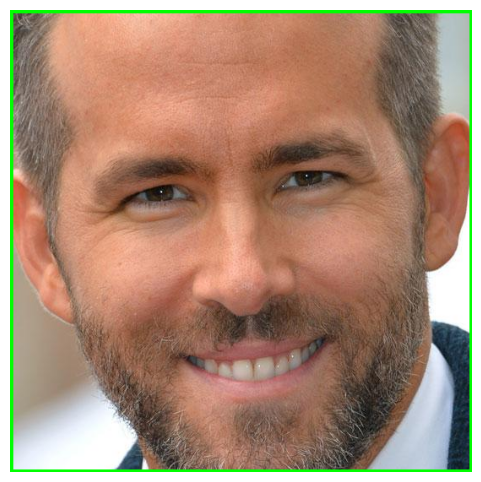

In [8]:
image_path="C:\\Users\\Harsh\\Pictures\\Major Project\\ryan.jpg"
img,cimg=face_detection_img(image_path)

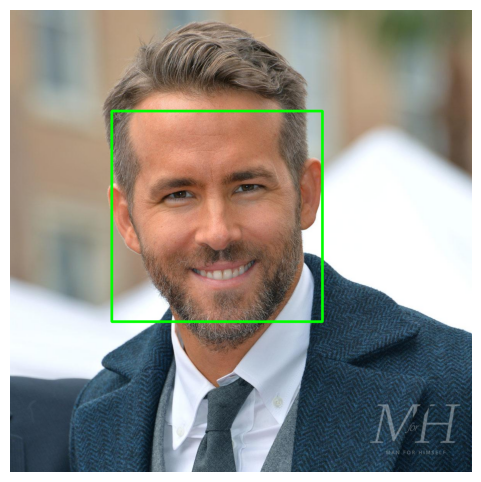

In [9]:
display(img)

In [11]:
# rows,cols,_=img.shape

In [12]:
# print("rows",rows)
# print("cols",cols)
# print(x,y,w,h)

# Facial Feature Extraction

In [10]:
import numpy as np


In [14]:
pip install "C:\Users\Harsh\Downloads\dlib-19.22.99-cp310-cp310-win_amd64.whl"

Processing c:\users\harsh\downloads\dlib-19.22.99-cp310-cp310-win_amd64.whl
dlib is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import dlib

C:\Users\Harsh\Desktop\Major Project\detected_face\0.jpg
[[[  5 255   0]
  [  5 255   0]
  [  3 254   3]
  ...
  [  1 255   0]
  [  1 255   0]
  [  1 255   0]]

 [[  5 255   0]
  [  2 254   0]
  [  3 255   5]
  ...
  [  1 255   0]
  [  1 255   0]
  [  1 255   0]]

 [[  2 253   2]
  [  0 251   0]
  [  0 255   5]
  ...
  [  1 255   0]
  [  1 255   0]
  [  1 255   0]]

 ...

 [[  1 255   0]
  [  1 255   0]
  [  1 255   0]
  ...
  [ 12 249   8]
  [  1 255   0]
  [  1 255   0]]

 [[  1 255   0]
  [  1 255   0]
  [  1 255   0]
  ...
  [  1 255   0]
  [  1 255   0]
  [  1 255   0]]

 [[  1 255   0]
  [  1 255   0]
  [  1 255   0]
  ...
  [  1 255   0]
  [  1 255   0]
  [  1 255   0]]]
(547, 547, 3)


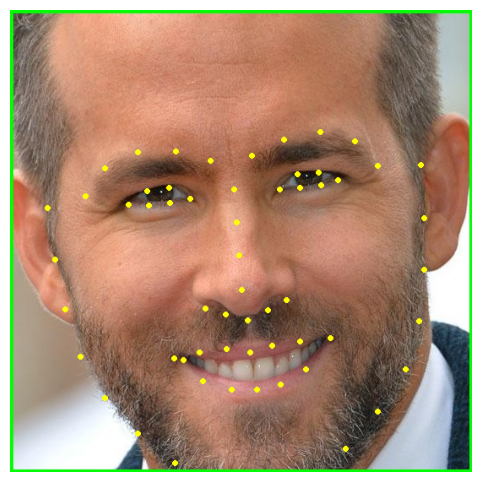

In [12]:
path="C:\\Users\\Harsh\\Desktop\\Major Project\\detected_face"
face_list=os.listdir(path)
for x in range(len(face_list)):
    imagepath="C:\\Users\\Harsh\\Desktop\\Major Project\\detected_face\\"+face_list[x]
    print(imagepath)
    cascPath= "C:\\Users\\Harsh\\Desktop\\Major Project\\haarcascade_frontalface_default.xml"

    predictor_path= "C:\\Users\\Harsh\\Desktop\\Major Project\\shape_predictor_68_face_landmarks.dat"

    jawline_points=list(range(0,17))
    right_eyebrow_points=list(range(17,22))
    left_eyebrow_points=list(range(22,27))
    nose_points=list(range(27,36))
    right_eye_points=list(range(36,42))
    left_eye_points=list(range(42,48))
    mouth_outline_points=list(range(48,61))
    mouth_inner_points=list(range(61,68))

    facecascade=cv2.CascadeClassifier(cascPath)

    predictor=dlib.shape_predictor(predictor_path)

    image=cv2.imread(imagepath)
    print(image)
    print(image.shape)
    gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    faces=facecascade.detectMultiScale(
        gray,
        scaleFactor=1.3,
        minNeighbors=5,
        minSize=(100,100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

# print("FOUND {0} FACES!".format(len(faces)))


    for (x,y,w,h) in faces:
    
        dlib_rect=dlib.rectangle(int(x),int(y),int(x+w),int(y+h))
    
        landmarks=np.matrix([[p.x,p.y]
                             for p in predictor(image,dlib_rect).parts()])
    
        landmarks_display=landmarks[right_eye_points+left_eye_points+nose_points+jawline_points+right_eyebrow_points+left_eyebrow_points+ mouth_outline_points]
    
        for idx, point in enumerate(landmarks_display):
            pos=(point[0,0],point[0,1])
            cv2.circle(image,pos,2,color=(0,255,255),thickness=2)
        
# cv2.imshow("landmarks found",image)
# cv2.waitKey(0)

    display(image)

In [13]:
path="C:\\Users\\Harsh\\Desktop\\Major Project\\detected_face"
face_list=os.listdir(path)

for x in face_list:
    print(x)

0.jpg


# Emotion Recognition Using CNN

In [18]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [15]:
from PIL import Image as im
from matplotlib import pyplot

In [26]:
from keras.utils import to_categorical

In [16]:
# Load FER2013 dataset
data = pd.read_csv("C:\\Users\\Harsh\\Desktop\\Major Project\\Data\\fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [17]:
data.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [18]:
label_to_text={0:"anger",1:"disgust",2:"fear",3:"hapiness",4:"sadness",5:"surprise",6:"neutral"}

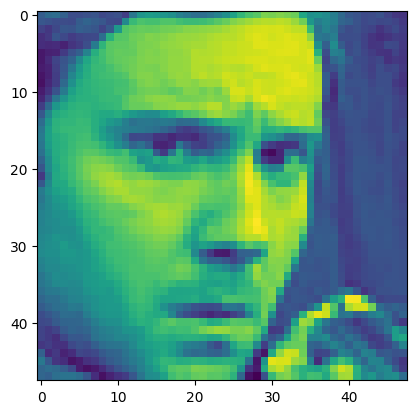

In [19]:
pyplot.imshow(np.array(data.pixels.loc[0].split(' ')).reshape(48,48).astype('float'))

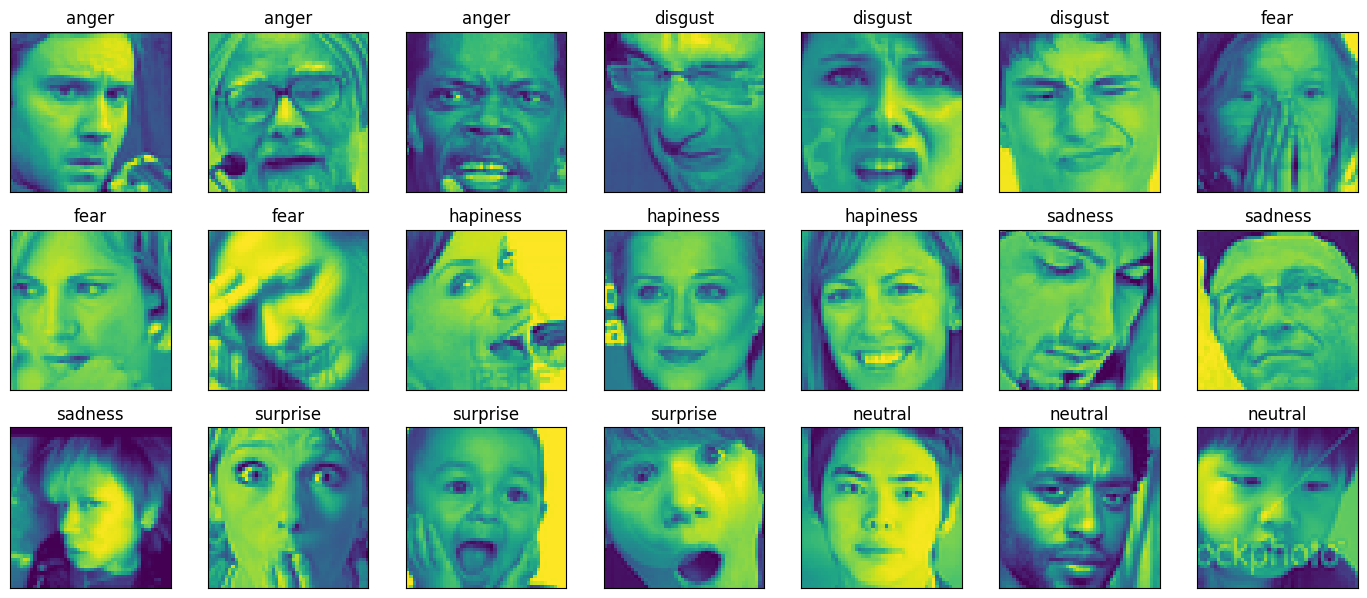

In [20]:
fig=pyplot.figure(1,(14,14))
k=0
for label in sorted(data.emotion.unique()):
    for j in range(3):
        px=data[data.emotion==label].pixels.iloc[k]
        px=np.array(px.split(' ')).reshape(48,48).astype('float32')
        k+=1
        ax=pyplot.subplot(7,7,k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [55]:
train_data = data[data['Usage'] == 'Training']
val_data = data[data['Usage'] == 'PublicTest']
test_data = data[data['Usage'] == 'PrivateTest']


# Preprocess data
X_train = np.array([np.fromstring(image, dtype=int, sep=' ') for image in train_data['pixels']])
X_val = np.array([np.fromstring(image, dtype=int, sep=' ') for image in val_data['pixels']])
X_test = np.array([np.fromstring(image, dtype=int, sep=' ') for image in test_data['pixels']])
y_train = to_categorical(train_data['emotion'])
y_val = to_categorical(val_data['emotion'])
y_test = to_categorical(test_data['emotion'])



In [56]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [57]:
datagen.fit(X_train)

ValueError: Input to `.fit()` should have rank 4. Got array with shape: (28709, 2304)

In [32]:
# Define model architecture
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 48, 48, 64)        0

In [34]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
# Train the model
batch_size = 256
epochs = 20

model.fit(datagen.flow(X_train, y_train, batch_size=batch_size), 
          steps_per_epoch=len(X_train) // batch_size, 
          epochs=epochs, 
          validation_data=(X_test, y_test))

Epoch 1/20
112/112 [==============================] - 878s 8s/step - loss: 2.0223 - accuracy: 0.2448 - val_loss: 1.8554 - val_accuracy: 0.2462
Epoch 2/20
112/112 [==============================] - 815s 7s/step - loss: 1.6972 - accuracy: 0.3473 - val_loss: 1.7950 - val_accuracy: 0.3016
Epoch 3/20
112/112 [==============================] - 857s 8s/step - loss: 1.5101 - accuracy: 0.4150 - val_loss: 1.7695 - val_accuracy: 0.3033
Epoch 4/20
112/112 [==============================] - 867s 8s/step - loss: 1.3853 - accuracy: 0.4698 - val_loss: 1.4605 - val_accuracy: 0.4195
Epoch 5/20
112/112 [==============================] - 939s 8s/step - loss: 1.3172 - accuracy: 0.5012 - val_loss: 1.3510 - val_accuracy: 0.4765
Epoch 6/20
112/112 [==============================] - 928s 8s/step - loss: 1.2732 - accuracy: 0.5157 - val_loss: 1.2551 - val_accuracy: 0.5125
Epoch 7/20
112/112 [==============================] - 756s 7s/step - loss: 1.2293 - accuracy: 0.5324 - val_loss: 1.2082 - val_accuracy: 0.5460

In [37]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

225/225 - 41s - loss: 1.0075 - accuracy: 0.6255 - 41s/epoch - 183ms/step

Test accuracy: 0.6255224347114563


In [44]:
from keras.models import load_model
model.save("emotion_model.h5")

In [46]:
loaded_model=load_model("emotion_model.h5")
loss,accuracy=loaded_model.evaluate(X_test,y_test)

225/225 [==============================] - 33s 133ms/step - loss: 1.0075 - accuracy: 0.6255


In [47]:
loss

1.0074512958526611

In [48]:
accuracy

0.6255224347114563

actual label is hapiness
1/1 [==============================] - 0s 22ms/step
predicted label is hapiness


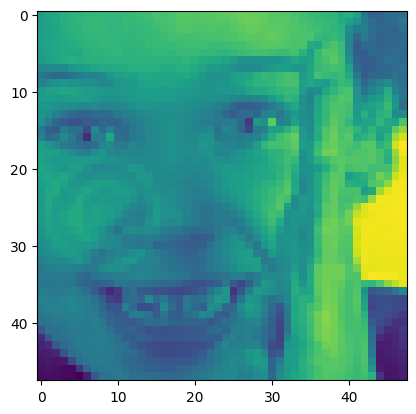

actual label is neutral
1/1 [==============================] - 0s 43ms/step
predicted label is hapiness


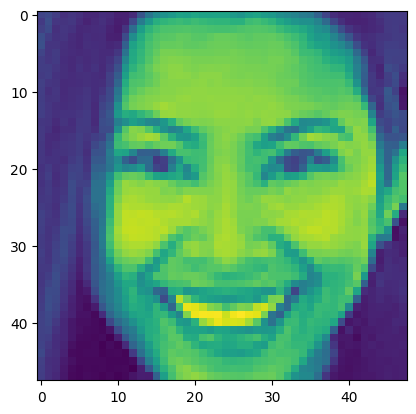

actual label is anger
1/1 [==============================] - 0s 73ms/step
predicted label is surprise


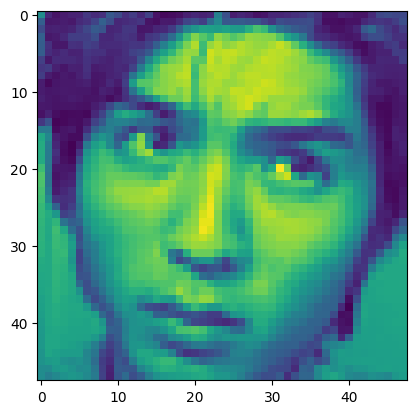

actual label is sadness
1/1 [==============================] - 0s 37ms/step
predicted label is neutral


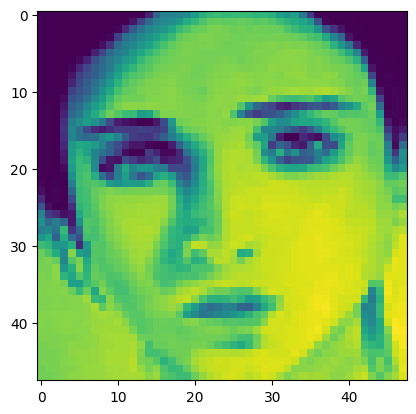

actual label is anger
1/1 [==============================] - 0s 102ms/step
predicted label is anger


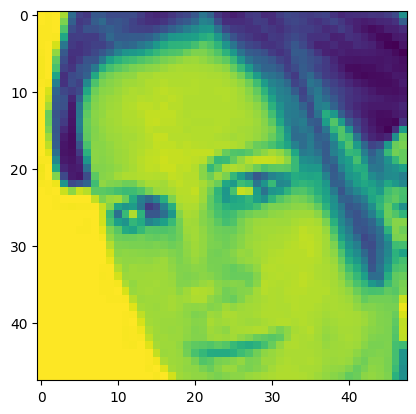

actual label is neutral
1/1 [==============================] - 0s 63ms/step
predicted label is neutral


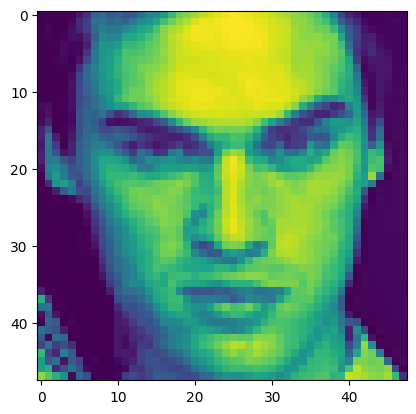

actual label is sadness
1/1 [==============================] - 0s 31ms/step
predicted label is sadness


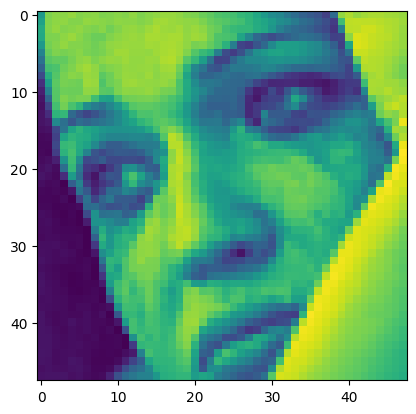

actual label is fear
1/1 [==============================] - 0s 74ms/step
predicted label is fear


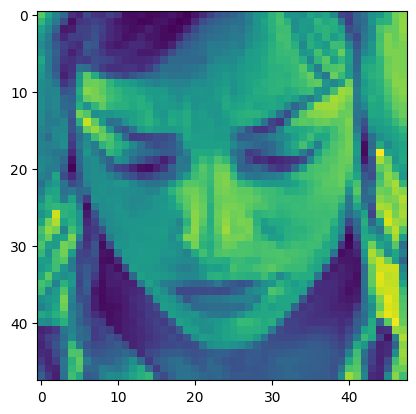

actual label is neutral
1/1 [==============================] - 0s 83ms/step
predicted label is anger


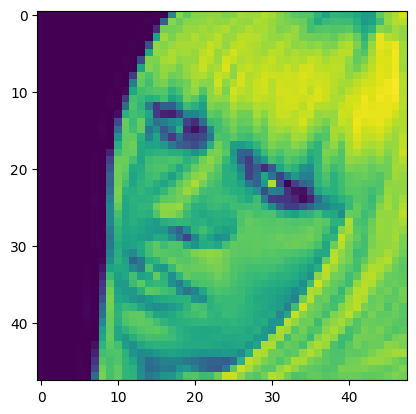

actual label is fear
1/1 [==============================] - 0s 35ms/step
predicted label is hapiness


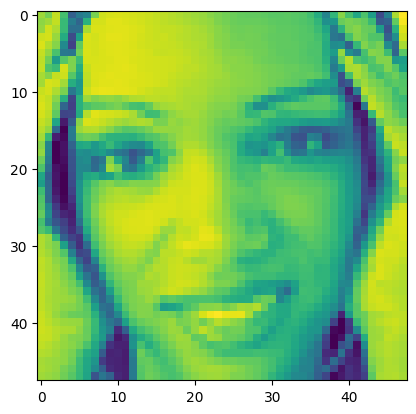

actual label is neutral
1/1 [==============================] - 0s 33ms/step
predicted label is neutral


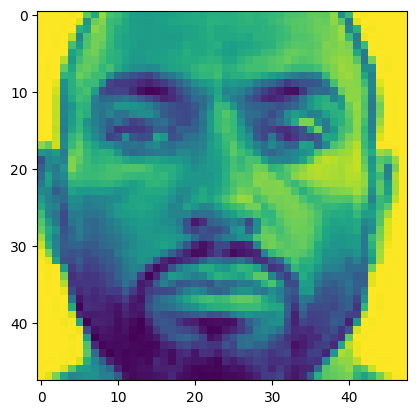

actual label is hapiness
1/1 [==============================] - 0s 39ms/step
predicted label is hapiness


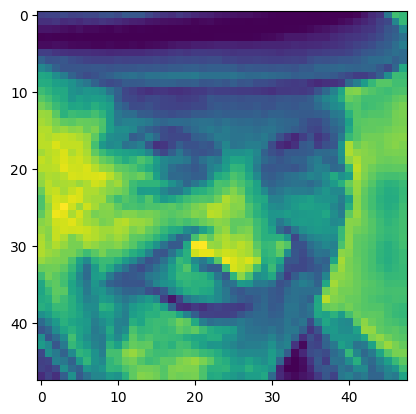

actual label is anger
1/1 [==============================] - 0s 49ms/step
predicted label is anger


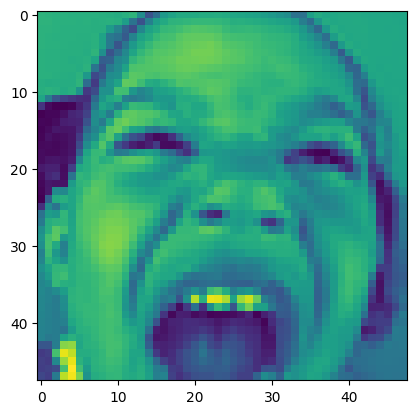

actual label is anger
1/1 [==============================] - 0s 37ms/step
predicted label is neutral


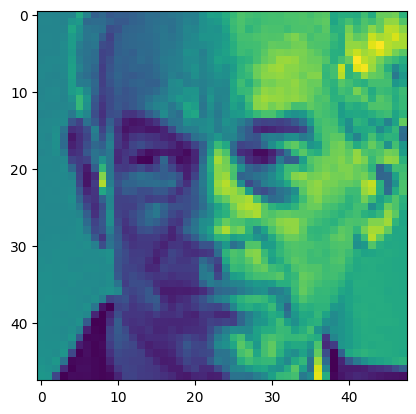

actual label is anger
1/1 [==============================] - 0s 35ms/step
predicted label is anger


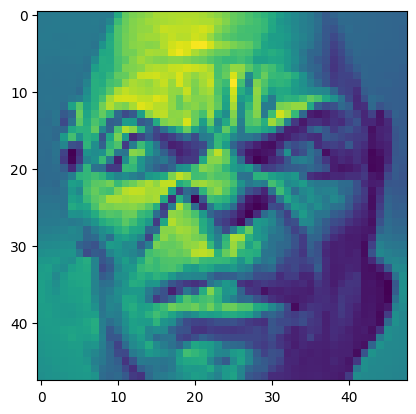

actual label is sadness
1/1 [==============================] - 0s 33ms/step
predicted label is anger


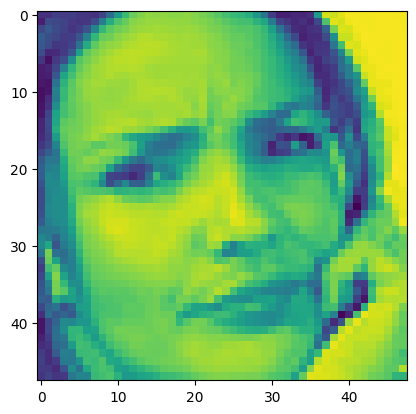

actual label is neutral
1/1 [==============================] - 0s 383ms/step
predicted label is neutral


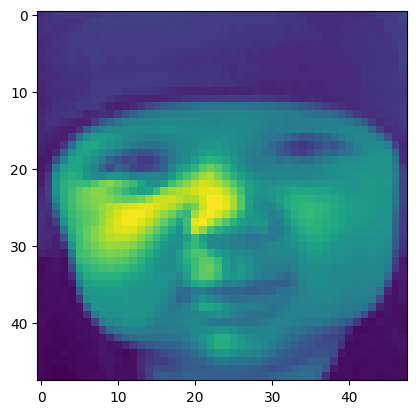

actual label is fear
1/1 [==============================] - 0s 40ms/step
predicted label is neutral


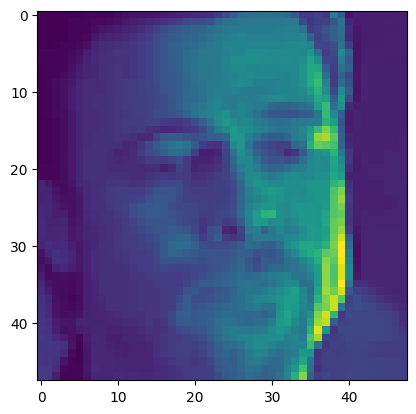

actual label is surprise
1/1 [==============================] - 0s 27ms/step
predicted label is surprise


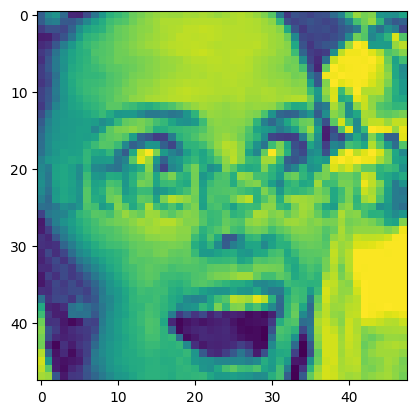

actual label is anger
1/1 [==============================] - 0s 32ms/step
predicted label is surprise


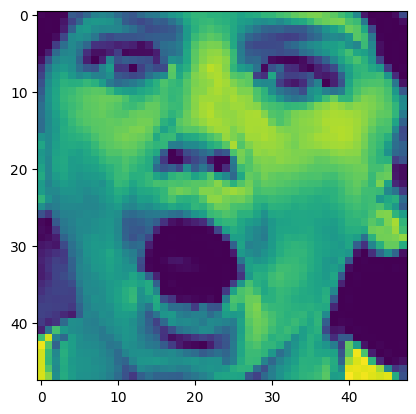

actual label is anger
1/1 [==============================] - 0s 31ms/step
predicted label is anger


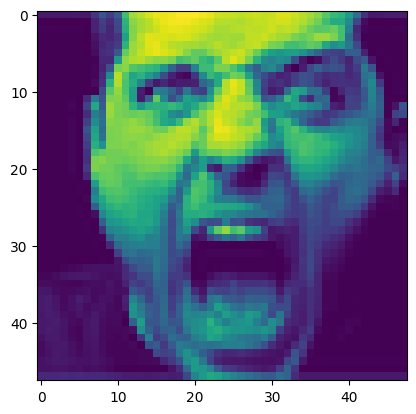

actual label is sadness
1/1 [==============================] - 0s 25ms/step
predicted label is neutral


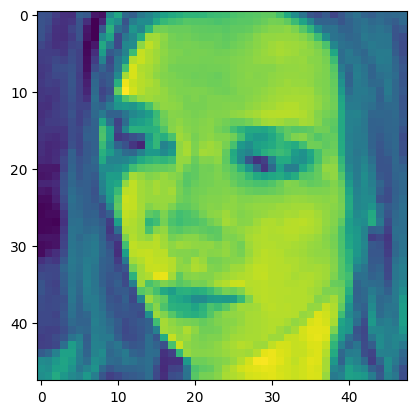

actual label is fear
1/1 [==============================] - 0s 54ms/step
predicted label is anger


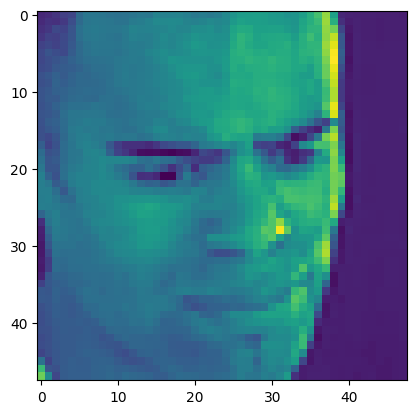

actual label is surprise
1/1 [==============================] - 0s 33ms/step
predicted label is surprise


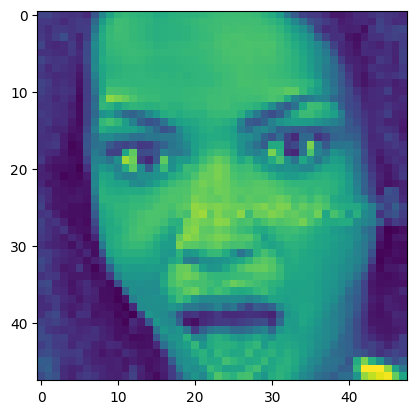

actual label is neutral
1/1 [==============================] - 0s 38ms/step
predicted label is neutral


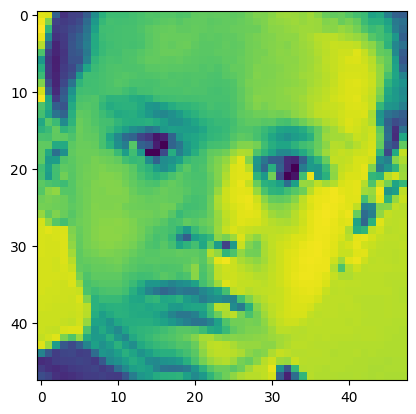

actual label is hapiness
1/1 [==============================] - 0s 32ms/step
predicted label is hapiness


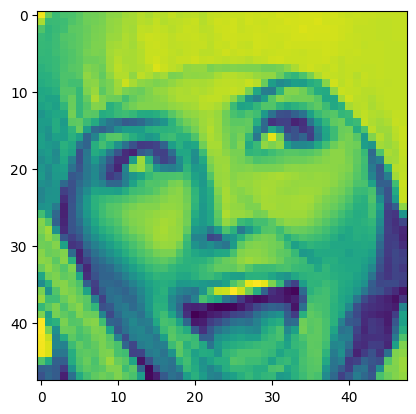

actual label is hapiness
1/1 [==============================] - 0s 42ms/step
predicted label is hapiness


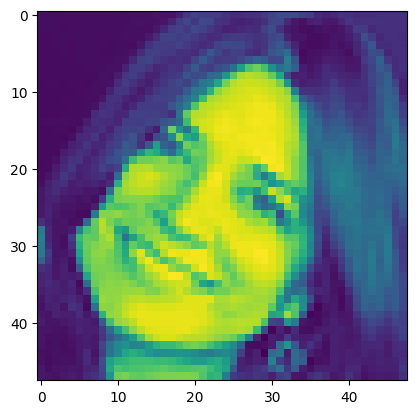

actual label is sadness
1/1 [==============================] - 0s 42ms/step
predicted label is neutral


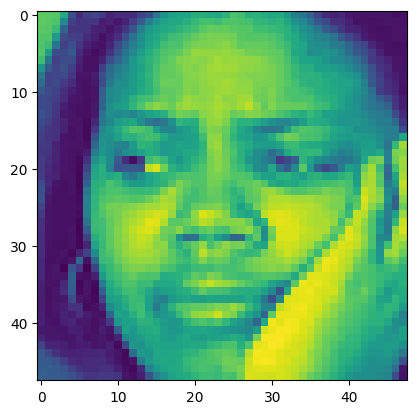

actual label is neutral
1/1 [==============================] - 0s 103ms/step
predicted label is neutral


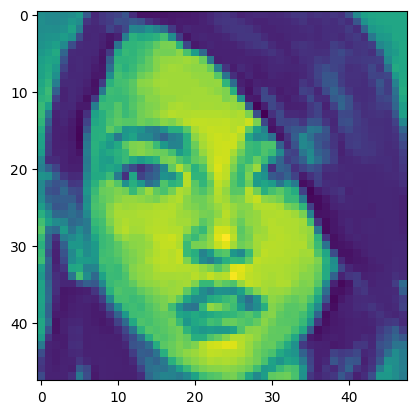

actual label is sadness
1/1 [==============================] - 0s 39ms/step
predicted label is neutral


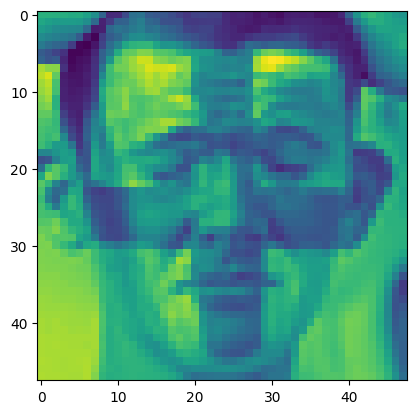

actual label is sadness
1/1 [==============================] - 0s 25ms/step
predicted label is sadness


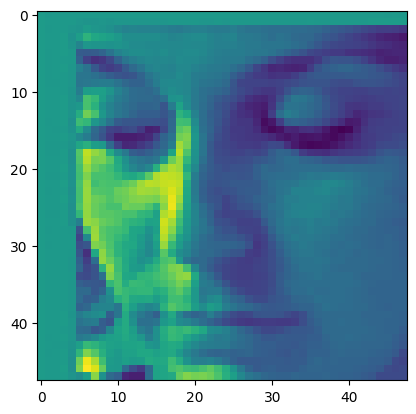

actual label is hapiness
1/1 [==============================] - 0s 41ms/step
predicted label is hapiness


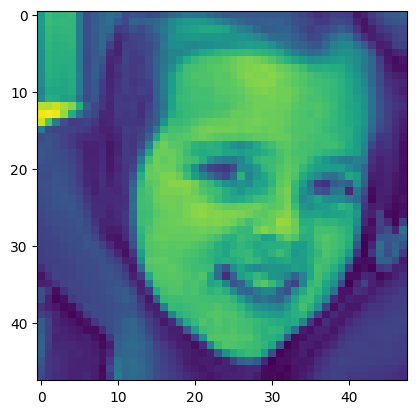

actual label is hapiness
1/1 [==============================] - 0s 76ms/step
predicted label is hapiness


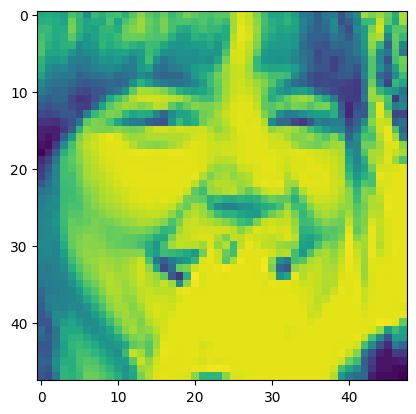

actual label is surprise
1/1 [==============================] - 0s 28ms/step
predicted label is surprise


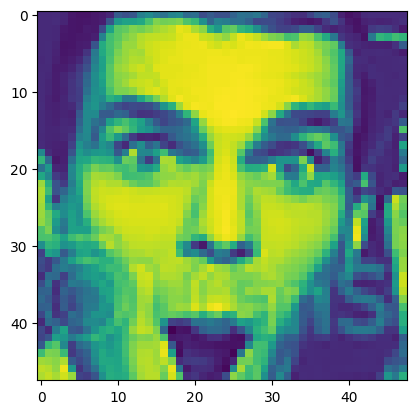

actual label is fear
1/1 [==============================] - 0s 29ms/step
predicted label is fear


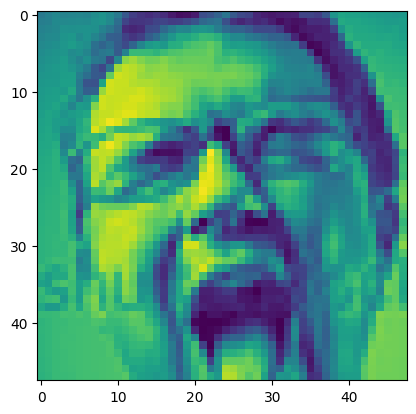

actual label is surprise
1/1 [==============================] - 0s 33ms/step
predicted label is surprise


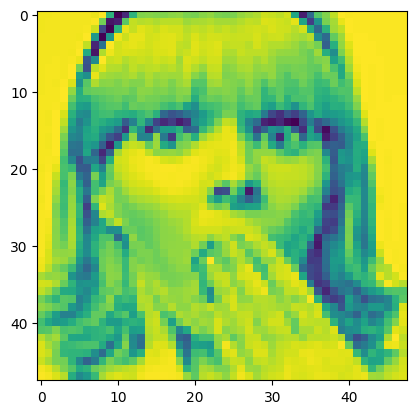

actual label is fear
1/1 [==============================] - 0s 37ms/step
predicted label is anger


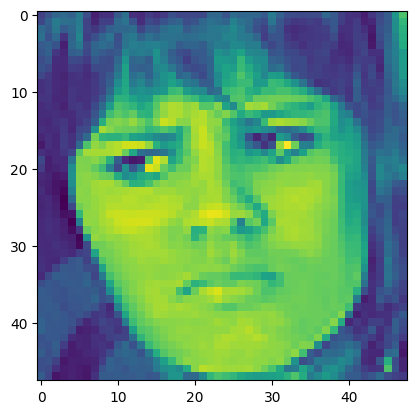

actual label is neutral
1/1 [==============================] - 0s 31ms/step
predicted label is hapiness


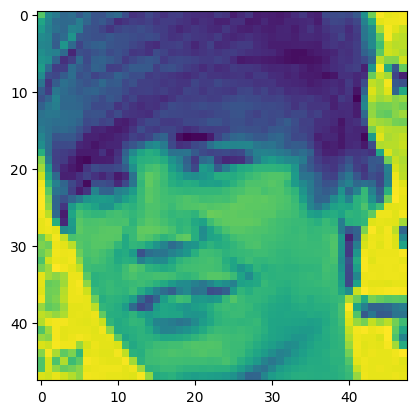

actual label is hapiness
1/1 [==============================] - 0s 51ms/step
predicted label is hapiness


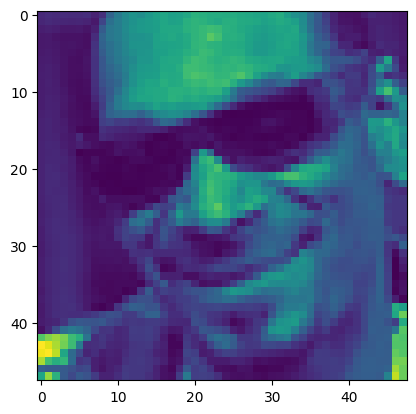

actual label is hapiness
1/1 [==============================] - 0s 24ms/step
predicted label is hapiness


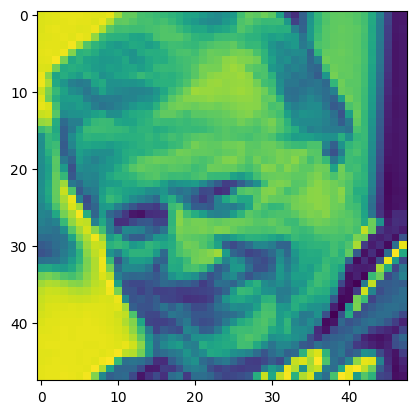

In [53]:
from IPython.display import clear_output
import time
for k in range(40):
    print(f'actual label is {label_to_text[y_test[k]]}')
    predicted_class=loaded_model.predict(tf.expand_dims(X_test[k],0)).argmax()
    print(f'predicted label is {label_to_text[predicted_class]}')
    pyplot.imshow(X_test[k])
    pyplot.show()
    time.sleep(3)
    clear_output(wait=True)